# Hands on Workshop: SAS and Python Integration
Learn how to use Python with SAS Viya via the SWAT package. This allows you to use Python syntax and packages combined with the distributed processing power of SAS Viya!


## Project Goals
1. Explore the data using the SWAT and Pandas packages.
2. Prepare the data using the Python SWAT package to process data in a distributed environment.
3. Use the final data created using Python in SAS Visual Analytics to create a dashboard.

In [1]:
##
## Display image function
##

from IPython.display import Image
def display_image(img):
    ''' Display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True)

## Introduction to SAS Viya

### SAS Viya Overview

In [ ]:
display_image('01_Viya_Overview.png')

**Expand notes below each slide for more information**


SAS Viya contains a variety of applications to process your data through the entirety of the analytics life cycle, but SAS Viya is much more than that. It's
 also cloud native, allowing scalable, web-based access to quick, accurate, and reliable analytical insights. 
Its in-memory engine and parallel processing capabilities can significantly improve the execution speed of your analytics. 
In its entirety, SAS Viya is a collaborative environment for all users. It enables everyone – data scientists, business analysts, developers, report viewers and executives alike – to collaborate, scale, and operationalize insights. 

How does all of this happen? SAS Viya includes multiple servers. The SAS Compute Server and SAS Cloud Analytic Services, or the CAS server for short. 
The SAS Compute Server enables you to execute traditional SAS code. The SAS Compute Server is the Viya equivalent of the SAS®9 workspace server. 

Then there’s the CAS server.  CAS has a massively parallel processing (MPP) architecture that is appropriate for analyzing big data and resource-intensive programs. It performs parallel processing on resident in-memory data to boost performance and produce lightning-fast results. It is optimal for big data and resource-intensive programs like machine learning. In this course, we focus on working with the CAS server in SAS Viya. 

All of these features are accessed from a web browser, and SAS Viya provides integration with open-source languages like Python, R, REST, JAVA, and LUA.

In [ ]:
display_image('02_Viya_Apps.png')

SAS Viya consists of many applications that enable you to work with your data no matter your job role or skill level. This can be done through the collection of integrated AI, analytic, and data management solutions in SAS Viya.

- The entry point for SAS Viya is **SAS Drive**, a collaborative interface for accessing, organizing, and sharing content. This application is the gateway to all other applications in SAS Viya. 
- **SAS Studio** is the interactive development environment (IDE) in SAS Viya that enables you to program, build flows, and even use point-and-click tools to process your data. 
- **SAS Visual Analytics** enables you to visualize data, build statistical models, and create interactive dashboards with an easy-to-use point-and-click interface.  
- **SAS Data Studio** is the data preparation application that enables you to easily prepare data using point-and-click transforms. It also enables you to easily embed custom code if necessary.
- **SAS Visual Statistics**, **SAS Visual Data Mining and Machine Learning**, and **SAS Visual Forecasting** are applications built for data scientists. Users can interactively create and refine predictive machine learning models and forecasts. 
- **SAS Model Manager** streamlines the model life cycle 
- **SAS Environment Manager** manages the entire environment. 

These are just a few of the many applications available in SAS Viya. All of these applications enable individuals in an organization to work with data.


### CAS Server Overview

In [ ]:
display_image('03_CAS_Overview1.png')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection. 

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)

In [ ]:
display_image('03_CAS_Overview2.png')

For data to be processed in CAS, data is copied into memory from some physical storage, and data blocks are automatically distributed across the worker nodes. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends.

In [ ]:
display_image('03_CAS_Overview3.png')

Because the data persists in memory, the same in-memory table can be accessed by multiple users and processes without any additional I/O (data load from disk to memory). Because I/O is more resource intensive, having data preloaded into memory speeds up the processing for all users.   

For example, person A can execute a variety of Python programs, person B can create dashboards using SAS Visual Analytics, and person C can execute machine learning models. All users can do this using the same in-memory table copy. 

In all instances, the controller accepts the programs from the client and distributes code to the workers. The workers perform coordinated parallel processing on their portion of the data, with multiple nodes executing the same actions on different parts of the data at the same time. The controller monitors progress and coordinates re-assembling the result segments produced by each worker. If requested by the client, the controller then returns the results to the client for further processing. Modifications to the in-memory table are not reflected in the physically stored data source. If you want to update the physical data source, the in-memory table must be explicitly saved back to the physical storage location. We discuss this later.

For big data or resource-intensive programs, the CAS server maximizes parallel processing and minimizes disk I/O by reducing read/write activity and can produce results in a remarkably short period of time. 

In [ ]:
display_image('03_CAS_Overview4.png')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! 

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.

The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

In [ ]:
display_image('04_Actions.png')

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data. These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

[SAS® Viya® Platform Actions and Action Sets by Name and Product](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/titlepage.htm)

In [ ]:
display_image('05_Client_Server.png')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


In [ ]:
display_image('07_pandas.png')

As an experienced Python programmer, you most likely are familiar with Python packages like Pandas, Matplotlib, NumPy, and seaborn. You might be thinking, “Great, I can use these packages on data in CAS!” 

**False!**

Although these are great packages, they do not execute on data on the CAS server. I'll repeat this because it's very important and a common misconception.  Native Python packages do not execute on data on the CAS server.


### SWAT Package Overview
[SWAT Documentation](https://sassoftware.github.io/python-swat/getting-started.html)

In [ ]:
display_image('08a_swat.png')

In order to process data with Python on the CAS server, you must use the SAS Scripting Wrapper for Analytics Transfer, or the SWAT package for short. This is an open-source package used with Python, R, and Lua. With the SWAT package, you can write a program that connects to the CAS server, quickly load large amounts of data into memory, analyze the data, and then work with the results of your analysis using familiar techniques in the open-source language of your choice.

The Python SWAT package contains many familiar Pandas methods, functions, and attributes that work like their counterparts. However, not all methods and functions are available, so be sure to download the latest version of the SWAT package for the most up-to-date functionality.

The SWAT package also contains an enormous number of CAS actions and CAS methods that can be used to process your data.

For example, with the SWAT package, you can use the familiar head method from the Pandas API on a CAS table to return the first n rows of a CAS table.

In all cases, the code is translated through the CAS API into the same fetch CAS action behind the scenes and sent to the CAS server. The action is processed in CAS, and the results are sent from the CAS server to the client.The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.

The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.

In [ ]:
display_image('09_client_server.png')

In the end, having both your Python client and the CAS server offers you a lot of flexibility. The goal is to look at each as a tool and determine the best tool for the job.

# Accessing, exploring, preparing and analyzing data using the Python SWAT Package

## 1. <a id='Setup'>Setup (REQUIRED)</a>

### a. Import packages

In [13]:
import sys
import os
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set pandas column options
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_columns', None)


## My personal module to connect to CAS. Will not work in other environments. The package is specific to my connection.
try:
    from casConnect import connect_to_cas
except:
    pass

## Check Python and package versions
print(f'Python version:{sys.version.split(" ")[0]}')
print(f'numpy:{np.__version__}')
print(f'pandas:{pd.__version__}')
print(f'swat:{swat.__version__}')

Python version:3.8.16
numpy:1.24.3
pandas:1.5.3
swat:1.13.0


### b. Connect to the CAS server

In [ ]:
display_image('10_CAS_session.png')

To begin working with CAS, you need to make a connection to the CAS server. This is known as a CAS session. A CAS session contains a variety of information and properties. These include server status and licensing, as well as session properties like timeout, locale, active caslib, metrics, and more. 

You can also create multiple CAS sessions on the CAS server, and these CAS sessions are independent of each other. One reason you would want to create multiple CAS sessions is to execute programs in parallel. One example would be if you want to execute three different machine learning models at the same time. Otherwise, if you do not terminate your connection to CAS, you might mistakenly create multiple connections to CAS, consuming resources.


To connect to the CAS server, you need:
- the host name, 
- the port number, 
- authentication

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [ ]:
###################################################################################
## General syntax
###################################################################################
## conn = swat.CAS('server.demo.sas.com', port number, 'username', 'password')
###################################################################################


###################################################################################
## Viya for Learners 3.5 CAS connection information
###################################################################################
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue,port=portValue,password=passwordToken)

#### REQUIRED: Create your CAS Connection

In [17]:
## my personal environment connection information to SAS Viya (will not work in your environment)
try:
    conn = connect_to_cas() 
except:
    print('This module is specific to my CAS connection. Please modify your connection to the CAS server')

View the type of the **conn** variable. Notice that it is a CAS connection object. We will use this object to interact with the CAS server.

In [18]:
type(conn)

swat.cas.connection.CAS

Confirm the connection is working and view the version of SAS Viya.

In [19]:
try:
    print(conn.about()['About']['Viya Version'])  ## SAS Viya version (most updated versions)
except:
    print(conn.about()['About']['Version'])       ## SAS Viya 3.5 VFL version

NOTE: Grid node action status report: 5 nodes, 9 total actions executed.
Stable 2023.04


### c. <a id='data'>Set up demonstration data</a>
Create the demonstration data for this workshop. The demonstration data comes from the **Samples** caslib in SAS Viya. The **Samples** caslib is included in SAS Viya installations. The data we'll use is small sample data for training purposes.

Two files will be created in the **Casuser** caslib:
1. warranty_demo.csv
2. RAND_RETAILDEMO.csv

In [20]:
def setup_demo_data(datasourcefile, incaslib, outfilename, outcaslib):
    '''
    Loads a CAS table into memory and then saves it back to a caslib in the specified file format.
    
    Parameters
    -----------------
    datasourcefile : string
        Specify a server-side data source file to load into memory.
    incaslib : string
        Specify the caslib the data source file is located in.
    outfilename : string (filename.extension)
        Specify the name and extension of the file you want to save the CAS table as.
    outcaslib : string
        Specify what caslib to save the file back to.
    '''
    
    # Load data into memory abd name it demo_data in the casuser caslib
    conn.loadTable(path = datasourcefile, caslib = incaslib,
                   casout = {'name':'demo_data', 'caslib':'casuser', 'replace':True})

    # Save the demo_data CAS table back to disk
    conn.save(table = {'name':'demo_data', 'caslib':'casuser'},
              name = outfilename, caslib = outcaslib, replace=True)
    
    # Drop the demo_data CAS table
    conn.dropTable('demo_data', caslib = 'casuser')

    
## Load demo data
setup_demo_data(datasourcefile='WARRANTY_CLAIMS_0117.sashdat', incaslib='samples', 
                outfilename='warranty_demo.csv', outcaslib='casuser')

setup_demo_data(datasourcefile='RAND_RETAILDEMO.sashdat', incaslib='samples', 
                outfilename='RAND_RETAILDEMO.csv', outcaslib='casuser')

NOTE: Cloud Analytic Services made the file WARRANTY_CLAIMS_0117.sashdat available as table DEMO_DATA in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file warranty_demo.csv in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table demo_data from caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services made the file RAND_RETAILDEMO.sashdat available as table DEMO_DATA in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file RAND_RETAILDEMO.csv in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table demo_data from caslib CASUSER(Peter.Styliadis@sas.com).


## 2. Explore available data in the CAS server

[SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm) contain connection information and data-source specifics to connect with data sources throughout your organization.

In [ ]:
display_image('11a_caslibs.png')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View available caslibs (data sources) in the CAS server

[table.caslibInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-caslibinfo.htm) CAS action

In [22]:
conn.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(Peter.Styliadis@sas.com),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/,,1.0,0.0,1.0,1.0,0.0,1.0
1,cpgretl,PATH,,/cas/data/caslibs/cpgretail/,,1.0,0.0,0.0,0.0,0.0,0.0
2,CPSAppData,PATH,,/cas/data/caslibs/CPSAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
3,EDUPub,PATH,,/cas/data/caslibs/edupub/,,0.0,0.0,0.0,0.0,0.0,0.0
4,EP_CommunityCollege,PATH,,/cas/data/caslibs/educationpractice/EP_CommunityCollege/,,0.0,0.0,0.0,0.0,0.0,0.0
5,EP_DOE,PATH,,/cas/data/caslibs/educationpractice/EP_DOE/,,0.0,0.0,0.0,0.0,0.0,0.0
6,EP_Forecasting,PATH,,/cas/data/caslibs/educationpractice/EP_Forecasting/,,0.0,0.0,0.0,0.0,0.0,0.0
7,EP_K12,PATH,,/cas/data/caslibs/educationpractice/EP_K12/,,0.0,0.0,0.0,0.0,0.0,0.0
8,EP_SAfE,PATH,,/cas/data/caslibs/educationpractice/EP_SAfE/,,0.0,0.0,0.0,0.0,0.0,0.0
9,EP_Shapes,PATH,,/cas/data/caslibs/educationpractice/EP_Shapes/,,0.0,0.0,0.0,0.0,0.0,0.0


### b. View available data source files in a caslib

[table.fileInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-fileinfo.htm)  CAS action

In [23]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2023-02-23T14:21:31+00:00,1.992781e+09
1,-rwxr-xr-x,sas,sas,previoussales.sas7bdat,73728,,2023-04-26T20:22:48+00:00,1.998160e+09
2,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
3,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
4,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
5,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-05-30T13:10:29+00:00,2.001071e+09
6,-rwxr-xr-x,sas,sas,warranty_final.sashdat,115538520,NONE,2023-05-26T15:58:48+00:00,2.000736e+09
7,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.csv,240072190,,2023-05-30T13:10:38+00:00,2.001071e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-05-09T18:03:20+00:00,1.999275e+09


### c. View available in-memory CAS tables in a caslib

[table.tableInfo](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tableinfo.htm) CAS action

In [ ]:
conn.tableInfo(caslib = 'casuser')

### Let's practice! Section 2 (results can differ based on your environment)
**REQUIRED: To complete the practices make sure to run the sections to import packages and connect to the CAS server in the [Setup](#Setup) section.**


1. View all available data sources available to the CAS server. How many caslibs do you have in your environment?

**Expand collapsed cells below each question for the solution and output**

In [25]:
conn.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(Peter.Styliadis@sas.com),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/,,1.0,0.0,1.0,1.0,0.0,1.0
1,cpgretl,PATH,,/cas/data/caslibs/cpgretail/,,1.0,0.0,0.0,0.0,0.0,0.0
2,CPSAppData,PATH,,/cas/data/caslibs/CPSAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
3,EDUPub,PATH,,/cas/data/caslibs/edupub/,,0.0,0.0,0.0,0.0,0.0,0.0
4,EP_CommunityCollege,PATH,,/cas/data/caslibs/educationpractice/EP_CommunityCollege/,,0.0,0.0,0.0,0.0,0.0,0.0
5,EP_DOE,PATH,,/cas/data/caslibs/educationpractice/EP_DOE/,,0.0,0.0,0.0,0.0,0.0,0.0
6,EP_Forecasting,PATH,,/cas/data/caslibs/educationpractice/EP_Forecasting/,,0.0,0.0,0.0,0.0,0.0,0.0
7,EP_K12,PATH,,/cas/data/caslibs/educationpractice/EP_K12/,,0.0,0.0,0.0,0.0,0.0,0.0
8,EP_SAfE,PATH,,/cas/data/caslibs/educationpractice/EP_SAfE/,,0.0,0.0,0.0,0.0,0.0,0.0
9,EP_Shapes,PATH,,/cas/data/caslibs/educationpractice/EP_Shapes/,,0.0,0.0,0.0,0.0,0.0,0.0


2. View available data source files in the **Samples** caslib. How many files are available? What is the file extension of all the files?

In [287]:
conn.fileInfo(caslib = 'samples')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,COSTCHANGE.sashdat,9776,NONE,2021-12-18T18:35:03+00:00,1.955472e+09
1,-rwxr-xr-x,sas,sas,PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat,9312,NONE,2021-12-18T18:35:03+00:00,1.955472e+09
2,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.sashdat,42612664,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
3,-rwxr-xr-x,sas,sas,SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat,301312,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
4,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS_0117.sashdat,13563272,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
5,-rwxr-xr-x,sas,sas,WATER_CLUSTER.sashdat,773208,NONE,2021-12-18T18:35:04+00:00,1.955472e+09
6,-rwxr-xr-x,sas,sas,predef_svrtdist.sashdat,78872,NONE,2023-04-07T09:31:18+00:00,1.996479e+09


3. View available in-memory tables in the **Samples** caslib. Do you have any tables already loaded into memory in the **Samples** caslib?

In [288]:
conn.tableInfo(caslib = 'samples')

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,PROMO_EFFECTIVENESS_X_EFFECTS_2,promo_effectiveness_x_effects_2,14,11,0,utf-8,2023-05-15T16:01:38+00:00,2023-05-15T16:01:38+00:00,2023-05-24T19:52:09+00:00,UTF8,1.999786e+09,1.999786e+09,2.000577e+09,1,0,0,0,PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat,Samples,1,Adam.Hillman@sas.com,,2021-12-18T18:35:03+00:00,1.955472e+09
1,RAND_RETAILDEMO,,930046,40,0,utf-8,2023-05-15T16:01:39+00:00,2023-05-15T16:01:39+00:00,2023-05-24T19:52:09+00:00,UTF8,1.999786e+09,1.999786e+09,2.000577e+09,1,0,0,0,RAND_RETAILDEMO.sashdat,Samples,1,Adam.Hillman@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09
2,COSTCHANGE,,32,10,0,utf-8,2023-05-18T10:55:48+00:00,2023-05-18T10:55:48+00:00,2023-05-25T14:42:15+00:00,UTF8,2.000027e+09,2.000027e+09,2.000645e+09,1,0,0,0,COSTCHANGE.sashdat,Samples,1,Yassine.Chahbi@sas.com,,2021-12-18T18:35:03+00:00,1.955472e+09
3,WARRANTY_CLAIMS_0117,,153217,42,0,utf-8,2023-05-18T10:55:48+00:00,2023-05-18T10:55:48+00:00,2023-05-25T14:42:16+00:00,UTF8,2.000027e+09,2.000027e+09,2.000645e+09,1,0,0,0,WARRANTY_CLAIMS_0117.sashdat,Samples,1,Yassine.Chahbi@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09
4,SW_LAKE_RT_SENSOR_WATERQUALITY,,8228,51,0,utf-8,2023-05-18T14:21:42+00:00,2023-05-18T14:21:42+00:00,2023-05-25T13:08:44+00:00,UTF8,2.000039e+09,2.000039e+09,2.000639e+09,1,0,0,0,SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat,Samples,1,Wilson.Kobayashi@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09
5,WATER_CLUSTER,,46720,21,0,utf-8,2023-05-19T20:30:38+00:00,2023-05-19T20:30:38+00:00,2023-05-25T13:08:45+00:00,UTF8,2.000147e+09,2.000147e+09,2.000639e+09,1,0,0,0,WATER_CLUSTER.sashdat,Samples,1,Ted.Stolarczyk@sas.com,,2021-12-18T18:35:04+00:00,1.955472e+09


## 3. Load a file into memory in the the CAS server

### a. Load a server-side file into memory

View available data source files in the **Casuser** caslib. Confirm the **warranty_demo.csv** file exists. We will use this for the demonstrations.

In [26]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2023-02-23T14:21:31+00:00,1.992781e+09
1,-rwxr-xr-x,sas,sas,previoussales.sas7bdat,73728,,2023-04-26T20:22:48+00:00,1.998160e+09
2,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
3,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
4,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
5,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-05-30T13:10:29+00:00,2.001071e+09
6,-rwxr-xr-x,sas,sas,warranty_final.sashdat,115538520,NONE,2023-05-26T15:58:48+00:00,2.000736e+09
7,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.csv,240072190,,2023-05-30T13:10:38+00:00,2.001071e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-05-09T18:03:20+00:00,1.999275e+09


Use the [table.loadTable](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-loadtable.htm) CAS action to load the **warranty_demo.csv** data source file into memory. The loadTable action is similar to a pandas read_ method. It is used for loading server-side files into memory in the CAS server.

In [27]:
conn.loadTable(path = 'warranty_demo.csv', caslib = 'casuser',   ## Specify the data source file and caslib location to load into memory
               importOptions = {'fileType':'CSV',                ## Import file specifications
                                'guessRows':10000},
               casOut = {'name':'warranty_demo',                 ## Specify the output CAS table information
                         'caslib':'casuser',
                         'replace':True})

NOTE: Cloud Analytic Services made the file warranty_demo.csv available as table WARRANTY_DEMO in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'WARRANTY_DEMO'

[casTable]

 CASTable('WARRANTY_DEMO', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.517s, user: 1.77s, sys: 0.556s, mem: 505mb

View the available in-memory tables in the **Casuser** caslib. Confirm the **WARRANTY_DEMO** CAS table is in-memory on the CAS server.

In [28]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,42,0,utf-8,2023-05-30T13:15:47+00:00,2023-05-30T13:15:47+00:00,2023-05-30T13:15:47+00:00,UTF8,2.001072e+09,2.001072e+09,2.001072e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-30T13:10:29+00:00,2.001071e+09
1,2023-05-28_WORDLELIST,14855,11,0,utf-8,2023-05-28T15:13:44+00:00,2023-05-28T15:13:44+00:00,2023-05-29T11:17:08+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_wordleList.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:28+00:00,2.000906e+09
2,2023-05-28_ALLLETTERS,74275,3,0,utf-8,2023-05-28T15:15:50+00:00,2023-05-28T15:15:50+00:00,2023-05-29T11:17:09+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_allletters.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:34+00:00,2.000906e+09


### b. Explore the CAS table

Create a client-side reference to the CAS table. 

In [29]:
castbl = conn.CASTable('WARRANTY_DEMO', caslib = 'casuser')
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

View the object type. Notice that it is a **CASTable** object.

In [30]:
type(castbl)

swat.cas.table.CASTable

You can use some familiar Pandas API methods on a **CASTable** object through the SWAT package, or execute CAS actions.

For example, use the shape attribute to view the attributes of the CAS table.

In [31]:
castbl.shape

(153217, 42)

View details about the CAS table using the [table.tableDetails](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tabledetails.htm) CAS action. Notice that the CAS table is distributed in blocks.

In [32]:
castbl.tableDetails()

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,ALL,210,105,153217,0,104045473,28049841,0,0,105,104058112,105,104058112,0,0,0,CAS


Use the [table.columnInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-columninfo.htm) CAS action to show CAS table column metadata. Notice that CAS table columns can contain SAS labels and formats. 

In [35]:
castbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,claim_attribute_1,,1,varchar,6,6,,0,0
1,seller_attribute_5,,2,double,8,12,,0,0
2,product_attribute_1,,3,varchar,2,2,,0,0
3,product_attribute_2,,4,varchar,2,2,,0,0
4,product_attribute_3,,5,double,8,12,,0,0
5,product_attribute_4,,6,varchar,6,6,,0,0
6,product_attribute_5,,7,double,8,12,,0,0
7,customer_attribute_1,,8,varchar,6,6,,0,0
8,x_product_attribute7,,9,varchar,10,10,,0,0
9,x_product_attribute9,,10,varchar,10,10,,0,0


Preview the distributed CAS table using the SWAT package head method.

In [36]:
castbl.head()

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,334.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D329,Engine,Energy Unit Assembly - Replace,1.0,21250.0,21253.0,21262.0,21257.0,E-009,782.0,E,1-889,1.0,C1_05003603_4V4NC9GH55N376575,19270.0,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Galacto,20921.0,NaN,20935.0,2017.0,,41.9716,-93.054
1,Type 4,140.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Charlotte,North America Commercial,Iowa,1.0,USA,D366,Engine,Energy Unit Assembly - Replace,1.0,21221.0,21224.0,21230.0,21228.0,E-009,782.0,E,5-211,5.0,C1_05003002_4V4NC9GHX5N377737,9754.0,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Galacto,20921.0,NaN,20923.0,2017.0,,41.9716,-93.054
2,Type 4,321.0,J1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D410,Engine,Valve: Moisture Ejector - Replace,1.0,21252.0,21255.0,21261.0,21259.0,E-001,782.0,E,7-155,7.0,C1_07112001_4V4NC9GH15N379103,11186.0,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Galacto,20970.0,20998.0,20984.0,2017.0,,41.9716,-93.054
3,Type 4,367.0,B1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Pittsburgh,North America Commercial,Iowa,1.0,USA,D390,Engine,Energy Unit Assembly - Replace,1.0,21174.0,21177.0,21190.0,21181.0,E-009,782.0,E,5-500,5.0,C1_07009802_4V4NC9GG55N376440,6269.0,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Galacto,20899.0,NaN,20913.0,2017.0,,41.9716,-93.054
4,Type 4,192.0,F1,XE,110.0,Zeus,2018.0,USA,4 cylinder,Charlotte,North America Commercial,Indiana,1.0,USA,D978,Engine,Valve: Pressure Relief - Replace,1.0,21220.0,21223.0,21232.0,21227.0,E-007,782.0,E,1-986,1.0,C1_07527501_4V4NC9TJ05N374628,8613.0,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Galacto,20874.0,20999.0,20887.0,2017.0,,40.1683,-86.271


### c. SWAT package objects overview
[CASTable vs. DataFrame vs. SASDataFrame](https://sassoftware.github.io/python-swat/table-vs-dataframe.html#castable-vs-dataframe-vs-sasdataframe)

In [ ]:
display_image('12a_swat_objects.png')

Because the SWAT package tries to blend the world of Pandas and CAS into a single world, you have to be aware of whether you are calling a CAS action or a Pandas API method from the SWAT package because the objects returned to the client will differ.

When you execute Pandas methods from the SWAT package, CAS can return a variety of objects to the client, such as a  CASTable, CASColumn, SASDataFrame, pandas.DataFrame, or pandas.Series.

When you execute a CAS action, CAS always returns a CASResults object (Python dictionary) to the Python client. 


#### CASTable object
**CASTable** objects and DataFrame object (either pandas.DataFrame or SASDataFrame) act very similar in many ways, but they are extremely different constructs. **CASTable** objects do not contain actual data. They are simply a client-side view of the data in a CAS table on a CAS server. DataFrames and SASDataFrames contain data in-memory on the client machine.

View the type of the castbl variable. Notice that it is a CASTable object.

In [40]:
type(castbl)

swat.cas.table.CASTable

Display the value of the **CASTable** object. Notice that it simply points to the **WARRANTY_DEMO** CAS table in the **Casuser** caslib. 

In [41]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

#### SASDataFrame object
The **SASDataFrame** object is a simple subclass of pandas.DataFrame and local to the client. It merely adds attributes to hold SAS metadata such as titles, labels, column metadata, etc. It also adds a few utility methods for handling By group representations.

Execute the SWAT head method on the CASTable object and store the result in the variable **df**. The view the type and value of **df**. Notice that is is a **SASDataFrame** object and it contains the actual data.

In [42]:
df = castbl.head()

display(type(df), df)

swat.dataframe.SASDataFrame

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,334.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D329,Engine,Energy Unit Assembly - Replace,1.0,21250.0,21253.0,21262.0,21257.0,E-009,782.0,E,1-889,1.0,C1_05003603_4V4NC9GH55N376575,19270.0,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Galacto,20921.0,NaN,20935.0,2017.0,,41.9716,-93.054
1,Type 4,140.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Charlotte,North America Commercial,Iowa,1.0,USA,D366,Engine,Energy Unit Assembly - Replace,1.0,21221.0,21224.0,21230.0,21228.0,E-009,782.0,E,5-211,5.0,C1_05003002_4V4NC9GHX5N377737,9754.0,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Galacto,20921.0,NaN,20923.0,2017.0,,41.9716,-93.054
2,Type 4,321.0,J1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D410,Engine,Valve: Moisture Ejector - Replace,1.0,21252.0,21255.0,21261.0,21259.0,E-001,782.0,E,7-155,7.0,C1_07112001_4V4NC9GH15N379103,11186.0,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Galacto,20970.0,20998.0,20984.0,2017.0,,41.9716,-93.054
3,Type 4,367.0,B1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Pittsburgh,North America Commercial,Iowa,1.0,USA,D390,Engine,Energy Unit Assembly - Replace,1.0,21174.0,21177.0,21190.0,21181.0,E-009,782.0,E,5-500,5.0,C1_07009802_4V4NC9GG55N376440,6269.0,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Galacto,20899.0,NaN,20913.0,2017.0,,41.9716,-93.054
4,Type 4,192.0,F1,XE,110.0,Zeus,2018.0,USA,4 cylinder,Charlotte,North America Commercial,Indiana,1.0,USA,D978,Engine,Valve: Pressure Relief - Replace,1.0,21220.0,21223.0,21232.0,21227.0,E-007,782.0,E,1-986,1.0,C1_07527501_4V4NC9TJ05N374628,8613.0,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Galacto,20874.0,20999.0,20887.0,2017.0,,40.1683,-86.271


#### CASResults object
The output of all CAS actions is a **CASResults** object. This is a Python dictionary with a few methods added to assist in handling the output keys, and attributes added to report information from the CAS action.

Execute the [table.fetch](https://go.documentation.sas.com/doc/en/pgmsascdc/v_036/caspg/cas-table-fetch.htm) CAS action and store the results in the variable **cr**. Then view the type and value of **cr**. Notice that it is a **CASResults** object (dictionary) and contains a single key, *Fetch*, and a **SASDataFrame**.

In [43]:
cr = castbl.fetch(to = 5)

display(type(cr), cr)

swat.cas.results.CASResults

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,334.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D329,Engine,Energy Unit Assembly - Replace,1.0,21250.0,21253.0,21262.0,21257.0,E-009,782.0,E,1-889,1.0,C1_05003603_4V4NC9GH55N376575,19270.0,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Galacto,20921.0,NaN,20935.0,2017.0,,41.9716,-93.054
1,Type 4,140.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Charlotte,North America Commercial,Iowa,1.0,USA,D366,Engine,Energy Unit Assembly - Replace,1.0,21221.0,21224.0,21230.0,21228.0,E-009,782.0,E,5-211,5.0,C1_05003002_4V4NC9GHX5N377737,9754.0,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Galacto,20921.0,NaN,20923.0,2017.0,,41.9716,-93.054
2,Type 4,321.0,J1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D410,Engine,Valve: Moisture Ejector - Replace,1.0,21252.0,21255.0,21261.0,21259.0,E-001,782.0,E,7-155,7.0,C1_07112001_4V4NC9GH15N379103,11186.0,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Galacto,20970.0,20998.0,20984.0,2017.0,,41.9716,-93.054
3,Type 4,367.0,B1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Pittsburgh,North America Commercial,Iowa,1.0,USA,D390,Engine,Energy Unit Assembly - Replace,1.0,21174.0,21177.0,21190.0,21181.0,E-009,782.0,E,5-500,5.0,C1_07009802_4V4NC9GG55N376440,6269.0,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Galacto,20899.0,NaN,20913.0,2017.0,,41.9716,-93.054
4,Type 4,192.0,F1,XE,110.0,Zeus,2018.0,USA,4 cylinder,Charlotte,North America Commercial,Indiana,1.0,USA,D978,Engine,Valve: Pressure Relief - Replace,1.0,21220.0,21223.0,21232.0,21227.0,E-007,782.0,E,1-986,1.0,C1_07527501_4V4NC9TJ05N374628,8613.0,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Galacto,20874.0,20999.0,20887.0,2017.0,,40.1683,-86.271


You can view the keys of a **CASResults** object using traditional dictionary manipulation techniques. For example, execute the keys method on the **CASResults** object.

In [44]:
cr.keys()

odict_keys(['Fetch'])

You can access the **SASDataFrame** by calling the *Fetch* key.

In [45]:
df = cr['Fetch']

display(type(df), df)

swat.dataframe.SASDataFrame

,claim_attribute_1,seller_attribute_5,product_attribute_1,product_attribute_2,product_attribute_3,product_attribute_4,product_attribute_5,customer_attribute_1,x_product_attribute7,x_product_attribute9,srvc_prvdr_attribute_1,srvc_prvdr_attribute_4,srvc_prvdr_attribute_2,srvc_prvdr_attribute_3,srvc_prvdr_attribute_5,primary_labor_group_desc,primary_labor_desc,total_claim_count,CLAIM_REPAIR_START_DT_SK,CLAIM_REPAIR_END_DT_SK,CLAIM_PROCESSED_DT_SK,CLAIM_SUBMITTED_DT_SK,PRIMARY_LABOR_CD,DEFECT_SK,PRIMARY_LABOR_GROUP_CD,PRIMARY_MATERIAL_ID,PRIMARY_MATERIAL_GROUP_CD,WARRANTY_CLAIM_ID,USAGE_VALUE,GROSS_CLAIM_AMT,GROSS_LABOR_AMT,GROSS_MATERIAL_AMT,GROSS_OTHER_AMT,PRODUCT_ID,PRODUCT_MODEL_CD,PRODUCTION_DT,IN_SERVICE_DT,SHIP_DT,SHIP_YEAR_CD,DEFECT_CD,service_provider_latitude,service_provider_longitude
0,Type 4,334.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D329,Engine,Energy Unit Assembly - Replace,1.0,21250.0,21253.0,21262.0,21257.0,E-009,782.0,E,1-889,1.0,C1_05003603_4V4NC9GH55N376575,19270.0,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Galacto,20921.0,NaN,20935.0,2017.0,,41.9716,-93.054
1,Type 4,140.0,H1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Charlotte,North America Commercial,Iowa,1.0,USA,D366,Engine,Energy Unit Assembly - Replace,1.0,21221.0,21224.0,21230.0,21228.0,E-009,782.0,E,5-211,5.0,C1_05003002_4V4NC9GHX5N377737,9754.0,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Galacto,20921.0,NaN,20923.0,2017.0,,41.9716,-93.054
2,Type 4,321.0,J1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Detroit,North America Commercial,Iowa,1.0,USA,D410,Engine,Valve: Moisture Ejector - Replace,1.0,21252.0,21255.0,21261.0,21259.0,E-001,782.0,E,7-155,7.0,C1_07112001_4V4NC9GH15N379103,11186.0,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Galacto,20970.0,20998.0,20984.0,2017.0,,41.9716,-93.054
3,Type 4,367.0,B1,XE,110.0,Zeus,2018.0,USA,8 cylinder,Pittsburgh,North America Commercial,Iowa,1.0,USA,D390,Engine,Energy Unit Assembly - Replace,1.0,21174.0,21177.0,21190.0,21181.0,E-009,782.0,E,5-500,5.0,C1_07009802_4V4NC9GG55N376440,6269.0,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Galacto,20899.0,NaN,20913.0,2017.0,,41.9716,-93.054
4,Type 4,192.0,F1,XE,110.0,Zeus,2018.0,USA,4 cylinder,Charlotte,North America Commercial,Indiana,1.0,USA,D978,Engine,Valve: Pressure Relief - Replace,1.0,21220.0,21223.0,21232.0,21227.0,E-007,782.0,E,1-986,1.0,C1_07527501_4V4NC9TJ05N374628,8613.0,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Galacto,20874.0,20999.0,20887.0,2017.0,,40.1683,-86.271


### d. Rename, drop and format columns in a CAS table

Get the name of all the columns in the CAS table using the columns attribute. Then create a list and store it in the variable **castableColumnNames**.

In [46]:
castableColumnNames = castbl.columns.to_list()
castableColumnNames

['claim_attribute_1',
 'seller_attribute_5',
 'product_attribute_1',
 'product_attribute_2',
 'product_attribute_3',
 'product_attribute_4',
 'product_attribute_5',
 'customer_attribute_1',
 'x_product_attribute7',
 'x_product_attribute9',
 'srvc_prvdr_attribute_1',
 'srvc_prvdr_attribute_4',
 'srvc_prvdr_attribute_2',
 'srvc_prvdr_attribute_3',
 'srvc_prvdr_attribute_5',
 'primary_labor_group_desc',
 'primary_labor_desc',
 'total_claim_count',
 'CLAIM_REPAIR_START_DT_SK',
 'CLAIM_REPAIR_END_DT_SK',
 'CLAIM_PROCESSED_DT_SK',
 'CLAIM_SUBMITTED_DT_SK',
 'PRIMARY_LABOR_CD',
 'DEFECT_SK',
 'PRIMARY_LABOR_GROUP_CD',
 'PRIMARY_MATERIAL_ID',
 'PRIMARY_MATERIAL_GROUP_CD',
 'WARRANTY_CLAIM_ID',
 'USAGE_VALUE',
 'GROSS_CLAIM_AMT',
 'GROSS_LABOR_AMT',
 'GROSS_MATERIAL_AMT',
 'GROSS_OTHER_AMT',
 'PRODUCT_ID',
 'PRODUCT_MODEL_CD',
 'PRODUCTION_DT',
 'IN_SERVICE_DT',
 'SHIP_DT',
 'SHIP_YEAR_CD',
 'DEFECT_CD',
 'service_provider_latitude',
 'service_provider_longitude']

Specify a list of your new column names. This list must be in the same order as the original column names to rename the columns.

In [47]:
newColumnNames = [
            'campaign_type','selling_dealer','vehicle_class','platform','trim_level','make','model_year','customer_country','engine_model',
            'vehicle_assembly_plant','repairing_division','repairing_state_province','repairing_region','repairing_country','repairing_dealer',
            'primary_labor_group','primary_labor_description','total_claim_count','claim_repair_start_date','claim_repair_end_date','claim_processed_date',
            'claim_submitted_date','primary_labor_code','defect_key','primary_labor_group_code','primary_replaced__material_id',
            'primary_replaced_material_group_code','warranty_claim_id','usage_value','gross_claim_amount','gross_labor_amount','gross_material_amount',
            'gross_other_amount','product_unit_id','product_model','product_unit_assembly_date','service_year_date','ship_date','ship_year','defect_code',
            'latitude','longitude'
]

Create a list of dictionaries that will be used to rename the columns in the CAS table. Add a SAS date format to the dictionary if the column name contains the string *date*.

In [51]:
updateColumns = []

## Create a list of dictionaries. Each dictionary specifies the current column name, and the name to rename it to. Add date formats to date columns
for position in range(len(castableColumnNames)):
    
    # Rename columns
    colUpdate = {'name' : castableColumnNames[position], 'rename' : newColumnNames[position]}
    
    # # Add date format to date columns
    if colUpdate['rename'].find('date') > 0:
        colUpdate['format'] = 'DATE9.'
        
    # Append dictionaries to list
    updateColumns.append(colUpdate)
    
updateColumns

[{'name': 'claim_attribute_1', 'rename': 'campaign_type'},
 {'name': 'seller_attribute_5', 'rename': 'selling_dealer'},
 {'name': 'product_attribute_1', 'rename': 'vehicle_class'},
 {'name': 'product_attribute_2', 'rename': 'platform'},
 {'name': 'product_attribute_3', 'rename': 'trim_level'},
 {'name': 'product_attribute_4', 'rename': 'make'},
 {'name': 'product_attribute_5', 'rename': 'model_year'},
 {'name': 'customer_attribute_1', 'rename': 'customer_country'},
 {'name': 'x_product_attribute7', 'rename': 'engine_model'},
 {'name': 'x_product_attribute9', 'rename': 'vehicle_assembly_plant'},
 {'name': 'srvc_prvdr_attribute_1', 'rename': 'repairing_division'},
 {'name': 'srvc_prvdr_attribute_4', 'rename': 'repairing_state_province'},
 {'name': 'srvc_prvdr_attribute_2', 'rename': 'repairing_region'},
 {'name': 'srvc_prvdr_attribute_3', 'rename': 'repairing_country'},
 {'name': 'srvc_prvdr_attribute_5', 'rename': 'repairing_dealer'},
 {'name': 'primary_labor_group_desc', 'rename': 'pri

Specify a list of columns to drop.

In [52]:
dropColumns = ['defect_code','repairing_division','usage_value','campaign_type','customer_country','ship_year',
               'product_unit_assembly_date','primary_replaced_material_group_code','primary_labor_group_code',
               'selling_dealer','vehicle_class','ship_date', 'total_claim_count']

Use the [table.alterTable](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-altertable.htm) CAS action to rename and drop columns.

In [53]:
castbl.alterTable(columns = updateColumns, 
                  drop = dropColumns)

+ Elapsed: 0.0134s, user: 0.0086s, sys: 0.0233s, mem: 2.44mb

View the new number of rows and columns in the CAS table.

In [54]:
castbl.shape

(153217, 29)

Preview the new CAS table.

In [55]:
castbl.head()

,platform,trim_level,make,model_year,engine_model,vehicle_assembly_plant,repairing_state_province,repairing_region,repairing_country,repairing_dealer,primary_labor_group,primary_labor_description,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,primary_labor_code,defect_key,primary_replaced__material_id,warranty_claim_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,product_model,service_year_date,latitude,longitude
0,XE,110.0,Zeus,2018.0,8 cylinder,Detroit,Iowa,1.0,USA,D329,Engine,Energy Unit Assembly - Replace,2018-03-07,2018-03-10,2018-03-19,2018-03-14,E-009,782.0,1-889,C1_05003603_4V4NC9GH55N376575,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Galacto,NaT,41.9716,-93.054
1,XE,110.0,Zeus,2018.0,8 cylinder,Charlotte,Iowa,1.0,USA,D366,Engine,Energy Unit Assembly - Replace,2018-02-06,2018-02-09,2018-02-15,2018-02-13,E-009,782.0,5-211,C1_05003002_4V4NC9GHX5N377737,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Galacto,NaT,41.9716,-93.054
2,XE,110.0,Zeus,2018.0,8 cylinder,Detroit,Iowa,1.0,USA,D410,Engine,Valve: Moisture Ejector - Replace,2018-03-09,2018-03-12,2018-03-18,2018-03-16,E-001,782.0,7-155,C1_07112001_4V4NC9GH15N379103,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Galacto,2017-06-28,41.9716,-93.054
3,XE,110.0,Zeus,2018.0,8 cylinder,Pittsburgh,Iowa,1.0,USA,D390,Engine,Energy Unit Assembly - Replace,2017-12-21,2017-12-24,2018-01-06,2017-12-28,E-009,782.0,5-500,C1_07009802_4V4NC9GG55N376440,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Galacto,NaT,41.9716,-93.054
4,XE,110.0,Zeus,2018.0,4 cylinder,Charlotte,Indiana,1.0,USA,D978,Engine,Valve: Pressure Relief - Replace,2018-02-05,2018-02-08,2018-02-17,2018-02-12,E-007,782.0,1-986,C1_07527501_4V4NC9TJ05N374628,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Galacto,2017-06-29,40.1683,-86.271


Rearrange the CAS table column order by specifying the new order of the columns (optional).

In [56]:
newColumnOrder = ['warranty_claim_id', 'make', 'product_model', 'model_year', 'platform', 'trim_level', 'engine_model','vehicle_assembly_plant',
                  'primary_labor_group', 'primary_labor_description', 'primary_labor_code', 'defect_key','primary_replaced__material_id', 'gross_claim_amount', 
                  'gross_labor_amount', 'gross_material_amount', 'gross_other_amount','product_unit_id', 'repairing_state_province', 'repairing_region', 
                  'repairing_country', 'repairing_dealer', 'latitude', 'longitude', 'claim_repair_start_date', 'claim_repair_end_date', 'claim_processed_date', 
                  'claim_submitted_date','service_year_date']

# Modify the order of the columns in the CAS table
castbl.alterTable(columnOrder = newColumnOrder)

# Preview the CAS table
castbl.head()

,warranty_claim_id,make,product_model,model_year,platform,trim_level,engine_model,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date
0,C1_05003603_4V4NC9GH55N376575,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Detroit,Engine,Energy Unit Assembly - Replace,E-009,782.0,1-889,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Iowa,1.0,USA,D329,41.9716,-93.054,2018-03-07,2018-03-10,2018-03-19,2018-03-14,NaT
1,C1_05003002_4V4NC9GHX5N377737,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Charlotte,Engine,Energy Unit Assembly - Replace,E-009,782.0,5-211,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Iowa,1.0,USA,D366,41.9716,-93.054,2018-02-06,2018-02-09,2018-02-15,2018-02-13,NaT
2,C1_07112001_4V4NC9GH15N379103,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Detroit,Engine,Valve: Moisture Ejector - Replace,E-001,782.0,7-155,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Iowa,1.0,USA,D410,41.9716,-93.054,2018-03-09,2018-03-12,2018-03-18,2018-03-16,2017-06-28
3,C1_07009802_4V4NC9GG55N376440,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Pittsburgh,Engine,Energy Unit Assembly - Replace,E-009,782.0,5-500,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Iowa,1.0,USA,D390,41.9716,-93.054,2017-12-21,2017-12-24,2018-01-06,2017-12-28,NaT
4,C1_07527501_4V4NC9TJ05N374628,Zeus,Galacto,2018.0,XE,110.0,4 cylinder,Charlotte,Engine,Valve: Pressure Relief - Replace,E-007,782.0,1-986,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Indiana,1.0,USA,D978,40.1683,-86.271,2018-02-05,2018-02-08,2018-02-17,2018-02-12,2017-06-29


### Let's practice! Section 3
1.  Use the [table.loadTable action](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-loadtable.htm?fromDefault=) to load a CSV server-side file into memory in the CAS server:
- Load the **RAND_RETAILDEMO.csv** file from the **Casuser** caslib into memory
- Name the CAS table **rand_retail_demo** and place it in the **Casuser** caslib's in-memory space.

The **RAND_RETAILDEMO.csv** provides retail sales information for customer purchases across multiple sales departments and stores

In [57]:
conn.loadTable(path = 'RAND_RETAILDEMO.csv', caslib = 'casuser',
               casOut = {
                   'name':'rand_retail_demo', 
                   'caslib':'casuser',
                   'replace':True
               })

NOTE: Cloud Analytic Services made the file RAND_RETAILDEMO.csv available as table RAND_RETAIL_DEMO in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'RAND_RETAIL_DEMO'

[casTable]

 CASTable('RAND_RETAIL_DEMO', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 1.55s, user: 9.54s, sys: 2.76s, mem: 770mb

2. View available in-memory tables in the **Casuser** caslib. How many rows and columns are in the new **RAND_RETAIL_DEMO** CAS table?

In [58]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,29,0,utf-8,2023-05-30T13:15:47+00:00,2023-05-30T13:23:04+00:00,2023-05-30T13:23:04+00:00,UTF8,2.001072e+09,2.001072e+09,2.001072e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-30T13:10:29+00:00,2.001071e+09
1,RAND_RETAIL_DEMO,930046,40,0,utf-8,2023-05-30T13:23:36+00:00,2023-05-30T13:23:36+00:00,2023-05-30T13:23:36+00:00,UTF8,2.001072e+09,2.001072e+09,2.001072e+09,0,0,0,0,RAND_RETAILDEMO.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-30T13:10:38+00:00,2.001071e+09
2,2023-05-28_WORDLELIST,14855,11,0,utf-8,2023-05-28T15:13:44+00:00,2023-05-28T15:13:44+00:00,2023-05-29T11:17:08+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_wordleList.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:28+00:00,2.000906e+09
3,2023-05-28_ALLLETTERS,74275,3,0,utf-8,2023-05-28T15:15:50+00:00,2023-05-28T15:15:50+00:00,2023-05-29T11:17:09+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_allletters.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:34+00:00,2.000906e+09


3. Reference the **RAND_RETAIL_DEMO** CAS table in the variable **retailTbl**. 

In [59]:
retailTbl = conn.CASTable('RAND_RETAIL_DEMO', caslib = 'casuser')
retailTbl

CASTable('RAND_RETAIL_DEMO', caslib='casuser')

4. View the table details of the **RAND_RETAIL_DEMO** CAS table. How many blocks is the CAS table broken up into? How many are active?

In [60]:
retailTbl.tableDetails()

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,ALL,1296,648,930046,0,514294117,97633509,0,0,648,514371088,648,514371088,0,0,0,CAS


5. Preview 5 rows of the **RAND_RETAIL_DEMO** CAS table. What is the name of the first column?

In [61]:
## Solution 1
df = retailTbl.head()

## Solution 2
cr = retailTbl.fetch(to = 5)

display(df, cr)

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Storeage,trx_hr_char,trx_dow_new,trx_tod,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,sss,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,Storechain1,brand_name1
0,30617291.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,PC games,921.0,2.0,11 AM,SUN,Morning,18237.0,43740.0,2009.0,21.0,7.0,147171.36,14.65,947.0,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,46-55,MODA,Maple
1,30617291.0,1.0,NaN,0.0,grocery,Oak,FAST,Internet,canned_goods,1060.0,8.0,3 PM,FRI,Afternoon,18228.0,40140.0,2009.0,19.0,4.0,66028.12,14.54,1219.0,Duluth,46.780373,-92.117079,United States,45.2213,-93.6086,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,MN,45.2213,-93.6086,Over 65,FAST,Oak
2,30617291.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_handbags,921.0,2.0,1 PM,SUN,Afternoon,18237.0,43740.0,2009.0,36.0,11.0,1973216.84,25.25,947.0,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,56-65,MODA,Maple
3,30617378.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,batteries,980.0,7.0,11 AM,SAT,Morning,18215.0,40140.0,2009.0,10.0,3.0,133939.19,6.50,898.0,Redmond,47.669414,-122.123875,United States,47.3522,-121.6130,US_WC,47.0,-121.00,US West Coast,47.0,-121.00,WA,47.3522,-121.6130,Over 65,FAST,Oak
4,30617439.0,1.0,NaN,0.0,women,Oak,FAST,Resale,women_jewelry,863.0,2.0,10 AM,MON,Morning,18266.0,4200.0,2010.0,58.0,32.0,1973216.84,25.91,1337.0,Toledo,41.665682,-83.575337,United States,40.4959,-82.7383,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,OH,40.4959,-82.7383,56-65,MODA,Maple


,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Storeage,trx_hr_char,trx_dow_new,trx_tod,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,sss,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,Storechain1,brand_name1
0,30617291.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,PC games,921.0,2.0,11 AM,SUN,Morning,18237.0,43740.0,2009.0,21.0,7.0,147171.36,14.65,947.0,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,46-55,MODA,Maple
1,30617291.0,1.0,NaN,0.0,grocery,Oak,FAST,Internet,canned_goods,1060.0,8.0,3 PM,FRI,Afternoon,18228.0,40140.0,2009.0,19.0,4.0,66028.12,14.54,1219.0,Duluth,46.780373,-92.117079,United States,45.2213,-93.6086,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,MN,45.2213,-93.6086,Over 65,FAST,Oak
2,30617291.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_handbags,921.0,2.0,1 PM,SUN,Afternoon,18237.0,43740.0,2009.0,36.0,11.0,1973216.84,25.25,947.0,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,56-65,MODA,Maple
3,30617378.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,batteries,980.0,7.0,11 AM,SAT,Morning,18215.0,40140.0,2009.0,10.0,3.0,133939.19,6.50,898.0,Redmond,47.669414,-122.123875,United States,47.3522,-121.6130,US_WC,47.0,-121.00,US West Coast,47.0,-121.00,WA,47.3522,-121.6130,Over 65,FAST,Oak
4,30617439.0,1.0,NaN,0.0,women,Oak,FAST,Resale,women_jewelry,863.0,2.0,10 AM,MON,Morning,18266.0,4200.0,2010.0,58.0,32.0,1973216.84,25.91,1337.0,Toledo,41.665682,-83.575337,United States,40.4959,-82.7383,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,OH,40.4959,-82.7383,56-65,MODA,Maple


6. View the column metadata of the **RAND_RETAIL_DEMO** CAS table. What are the column data types of this table?

In [62]:
retailTbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,CustID,,1,double,8,12,,0,0
1,bucket,,2,double,8,12,,0,0
2,age,,3,double,8,12,,0,0
3,loyalty_card,,4,double,8,12,,0,0
4,Department,,5,varchar,11,11,,0,0
5,brand_name,,6,varchar,5,5,,0,0
6,Storechain,,7,varchar,5,5,,0,0
7,ChannelType,,8,varchar,8,8,,0,0
8,Class,,9,varchar,21,21,,0,0
9,StoreNum,,10,double,8,12,,0,0


7. Use the [table.alterTable action](https://documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-altertable.htm) to drop the columns specified in the **dropColumns** variable from the **RAND_RETAIL_DEMO** CAS table. 

In [224]:
## Use the following variable to drop the specified columns
dropColumns = ['Storeage', 'trx_hr_char', 'trx_dow_new', 'trx_tod', 'sss', 'storechain1', 'brand_name1']

## Drop the columns below:


In [63]:
dropColumns = ['Storeage', 'trx_hr_char', 'trx_dow_new', 'trx_tod', 'sss', 'storechain1', 'brand_name1']

retailTbl.alterTable(drop = dropColumns)

+ Elapsed: 0.0103s, user: 0.0131s, sys: 0.00888s, mem: 1.48mb

8. Confirm the new **RAND_RETAIL_DEMO** CAS table has 930,046 rows and 33 columns.

In [64]:
retailTbl.shape

(930046, 33)

## 4. Exploratory data analysis

### a. Distinct and missing values

Use the pandas API unique method from the SWAT package to find unique values in a column.

In [66]:
castbl.make.unique()

array(['Apollo', 'Ares', 'Titan', 'Zeus'], dtype=object)

Use the [simple.distinct](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-distinct.htm) CAS action to compute the number of distinct and missing values of the columns. Use the *Distinct* key to access the **SASDataFrame** from the **CASResults** object returned from the CAS server and store it in the variable **distinct_df**.

In [67]:
distinct_df = castbl.distinct()['Distinct']

display(type(distinct_df),distinct_df)

swat.dataframe.SASDataFrame

,Column,NDistinct,NMiss,Trunc
0,warranty_claim_id,144681.0,0.0,0.0
1,make,4.0,0.0,0.0
2,product_model,21.0,0.0,0.0
3,model_year,5.0,0.0,0.0
4,platform,2.0,0.0,0.0
5,trim_level,60.0,0.0,0.0
6,engine_model,4.0,0.0,0.0
7,vehicle_assembly_plant,3.0,0.0,0.0
8,primary_labor_group,8.0,0.0,0.0
9,primary_labor_description,80.0,0.0,0.0


A **SASDataFrame** is a subclass of pandas DataFrame. Therefore, anything you can do with a pandas DataFrame will also work with **SASDataFrame**. **SASDataFrames** are local on the client.

Create the **pctDistinct** and **pctMissing** columns in the DataFrame using traditional pandas code. Sort the results in descending order and drop the **Trunc** column.

In [68]:
## Number of rows in the CAS table using the SWAT shape attribute
nRows = castbl.shape[0]

## Use traditional pandas code on the Python client to prepare the SASDataFrame
distinct_df = (distinct_df                                                 
               .assign(pctDistinct = distinct_df.NDistinct / nRows,
                       pctMissing = distinct_df.NMiss / nRows)
               .sort_values('pctDistinct', ascending = False)
               .drop('Trunc', axis = 1)
              )

distinct_df

,Column,NDistinct,NMiss,pctDistinct,pctMissing
0,warranty_claim_id,144681.0,0.0,0.944288,0.000000
13,gross_claim_amount,141891.0,0.0,0.926079,0.000000
14,gross_labor_amount,130643.0,0.0,0.852666,0.000000
15,gross_material_amount,106474.0,0.0,0.694923,0.000000
16,gross_other_amount,35288.0,0.0,0.230314,0.000000
17,product_unit_id,30679.0,0.0,0.200232,0.000000
12,primary_replaced__material_id,10000.0,0.0,0.065267,0.000000
26,claim_processed_date,1215.0,0.0,0.007930,0.000000
27,claim_submitted_date,1199.0,0.0,0.007826,0.000000
25,claim_repair_end_date,1196.0,0.0,0.007806,0.000000


Plot the percentage of missing and distinct values using traditional pandas on the client. The CAS server is not used here since we are working with the summarized results we received from the CAS server with the distinct action.

,pctMissing
Column,
service_year_date,0.412069


,pctDistinct
Column,
warranty_claim_id,0.944288
gross_claim_amount,0.926079
gross_labor_amount,0.852666
gross_material_amount,0.694923
gross_other_amount,0.230314
product_unit_id,0.200232


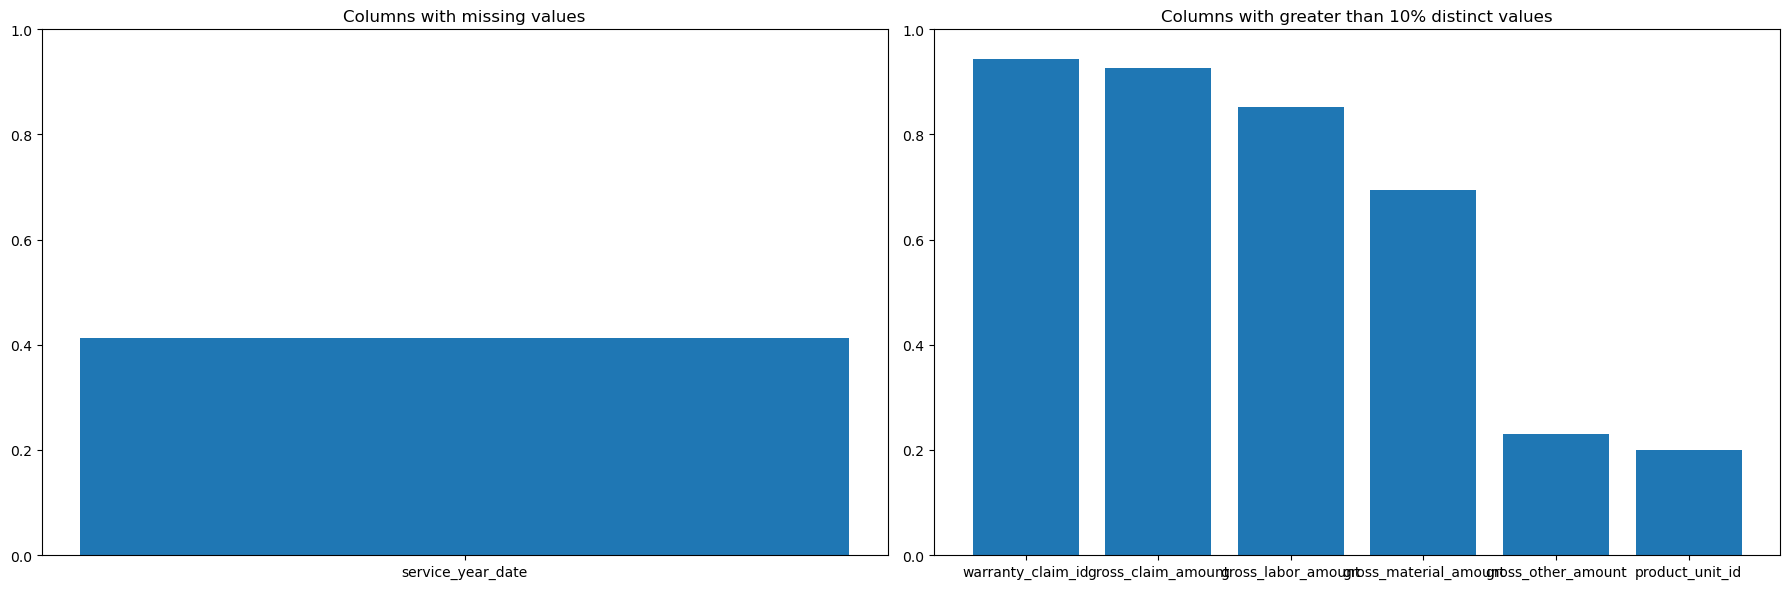

In [69]:
##
## Create the dataframes for the pctMissing and pctDistinct
##

## Missing columns dataframe
missing = (distinct_df
           .query('pctMissing > 0')
           .loc[:,['Column', 'pctMissing']]
           .set_index('Column')
          )

## Distinct columns over 10% distinct values dataframe
distinct_gt10 = (distinct_df
                 .query('pctDistinct > .1')
                 .loc[:,['Column','pctDistinct']]
                 .set_index('Column')
                )

display(missing, distinct_gt10)


##
## Plot the dataframes
##

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (18,6))

ax1.bar(missing.index, missing.pctMissing)
ax1.set_title('Columns with missing values')
ax1.set_ylim(top=1)

ax2.bar(distinct_gt10.index, distinct_gt10.pctDistinct)
ax2.set_title('Columns with greater than 10% distinct values')
ax2.set_ylim(top=1)

fig.tight_layout()

### b. Categorical columns

Use the SWAT package value_counts method to get unique counts of a column in a CAS table. Notice that the CAS server returns a Series to the client.

In [70]:
(castbl                               ## CAS table
 .make                                ## CAS table column
 .value_counts(normalize = True)      ## value_count swat method
)

Zeus      0.895221
Titan     0.095185
Ares      0.005783
Apollo    0.003812
dtype: float64

Create a loop to get unique value counts of the following columns using the CAS server. Then plot the Series returned from CAS.

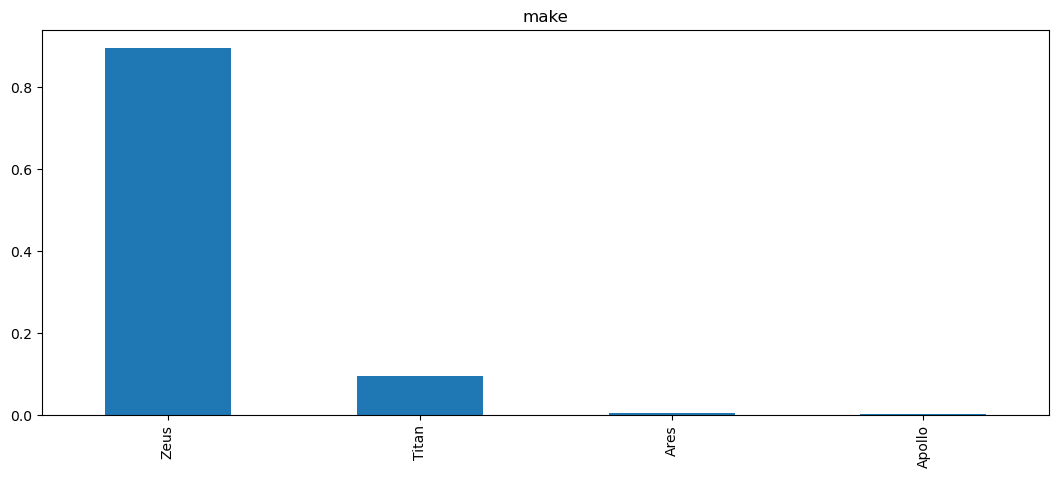

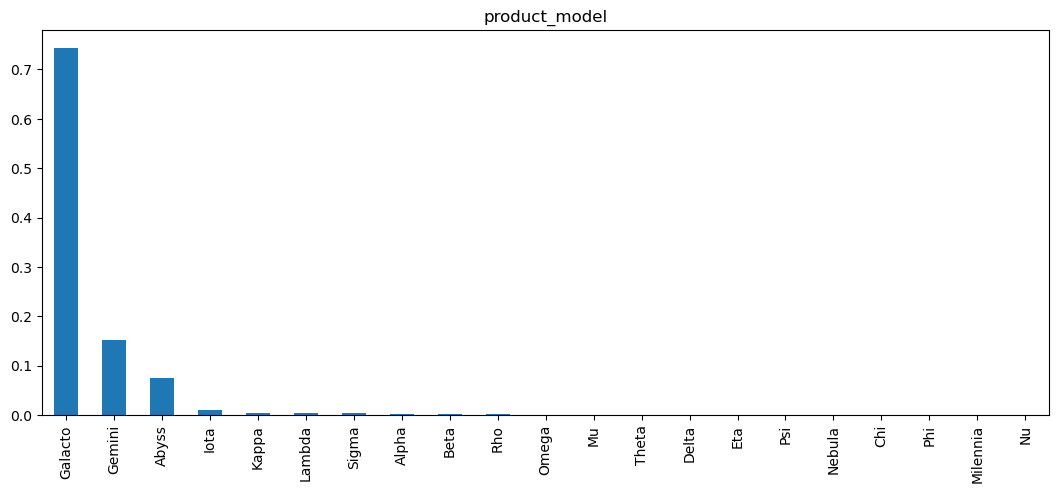

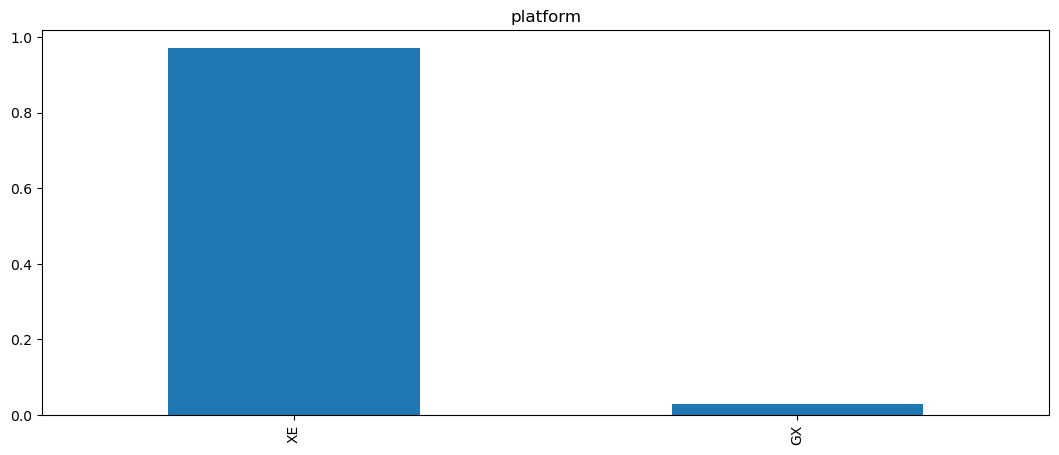

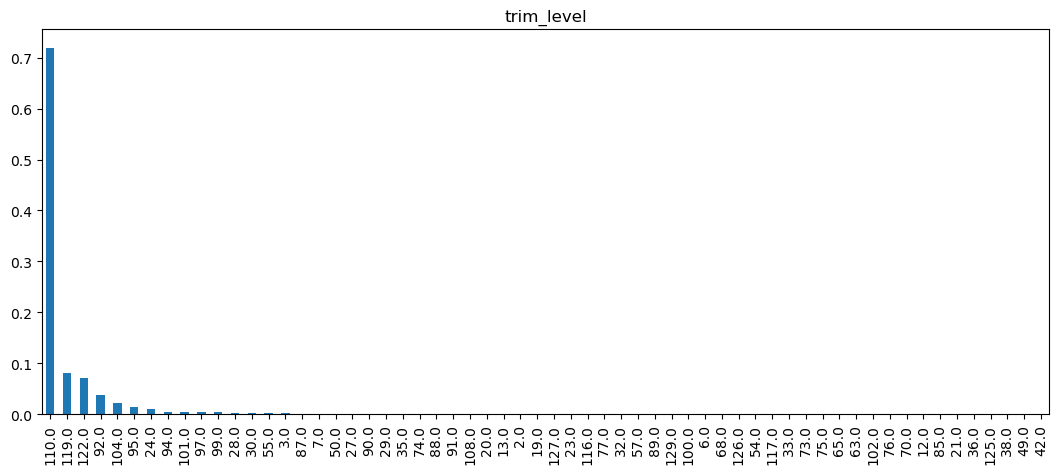

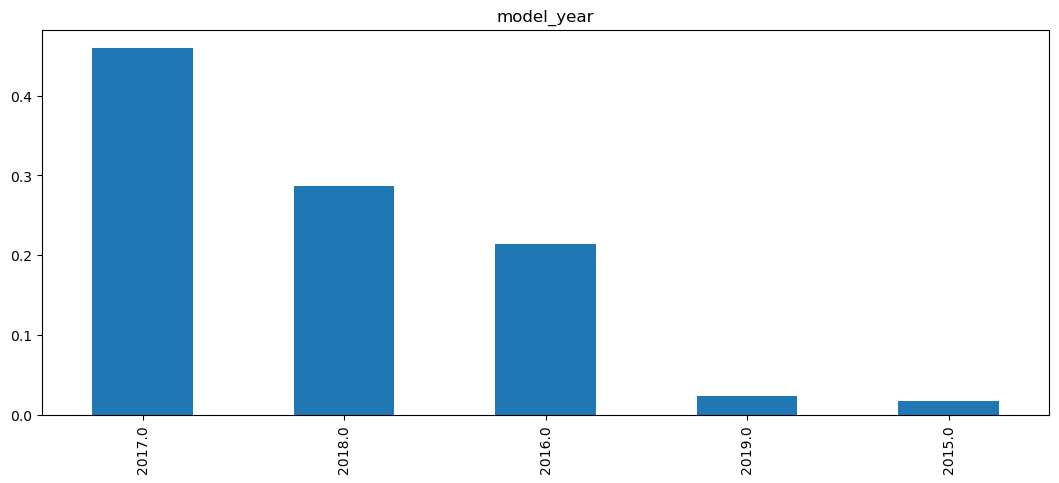

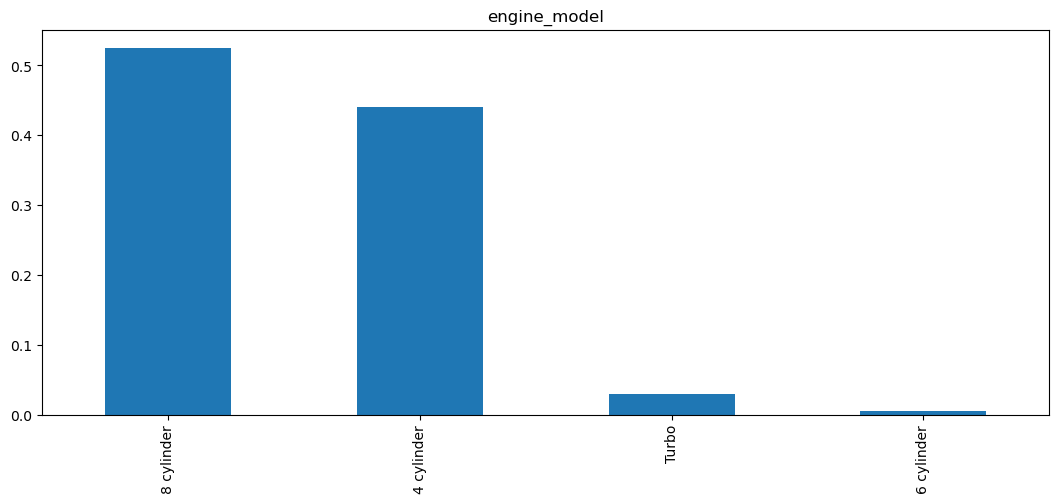

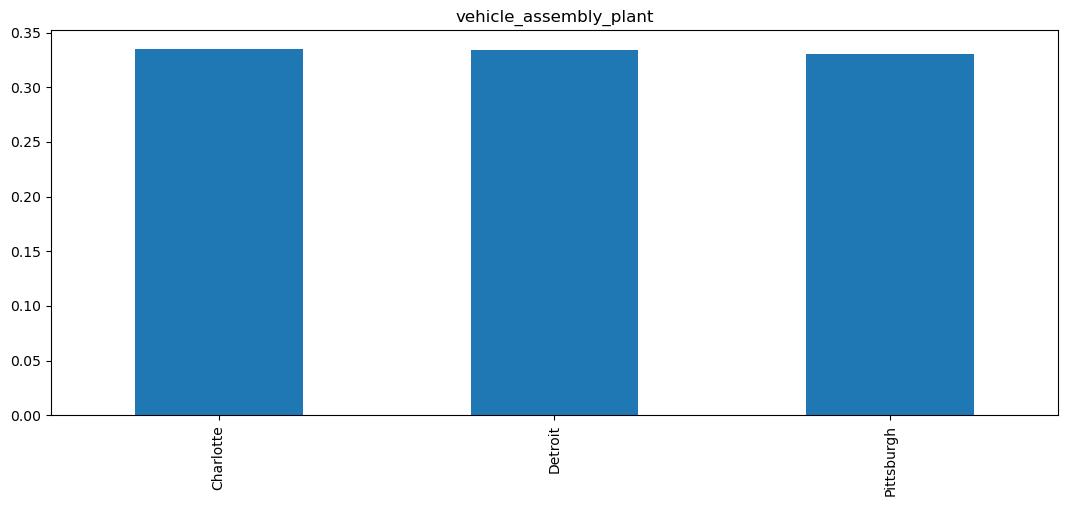

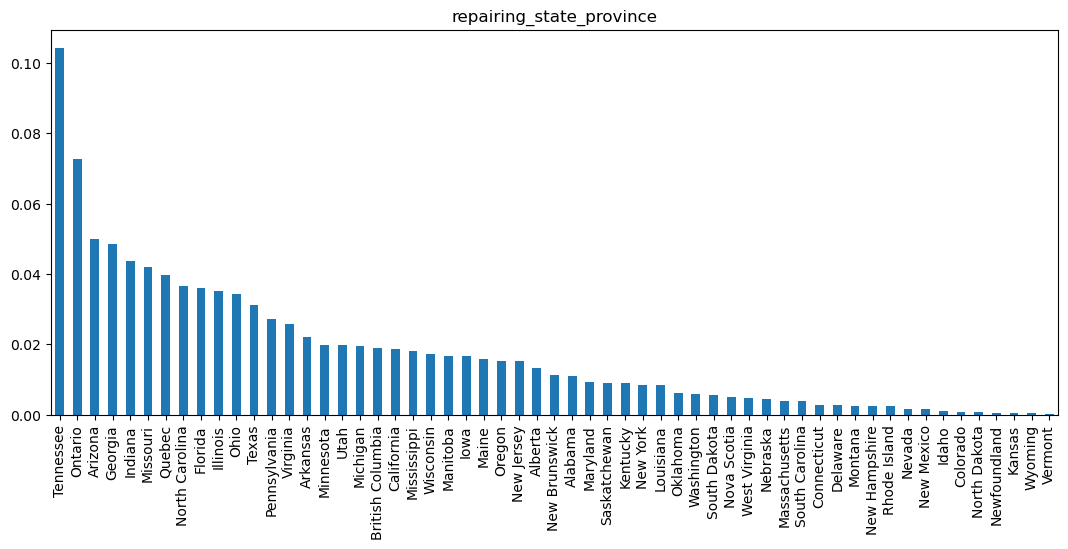

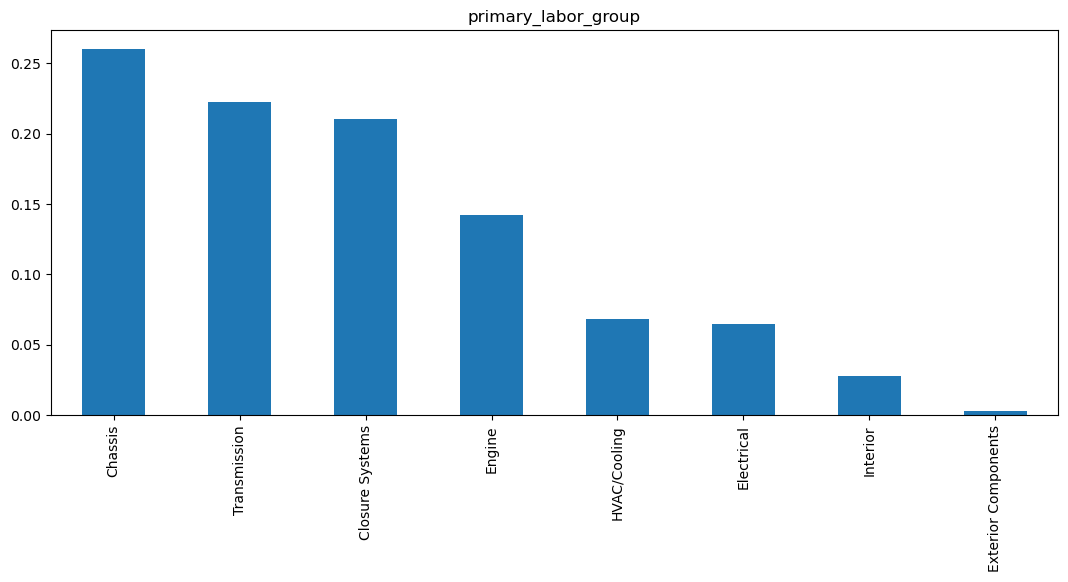

In [71]:
catColumns = ['make', 'product_model', 'platform', 'trim_level', 'model_year', 'engine_model', 'vehicle_assembly_plant', 'repairing_state_province','primary_labor_group']

for col in catColumns:
    (castbl[col]                                            ## CAS table column
     .value_counts(normalize = True)                        ## value_count swat method, summarizes the data in the distributed CAS server
     .plot(kind = 'bar', title = col, figsize = (13,5))     ## Plot the SASDataFrame on the client-side using pandas
    )
    plt.show()

View unique counts of the **primary_labor_description** column. Notice that there are 80 unique values. The values are descriptive and start with the main component.

In [72]:
(castbl                              ## CAS table 
 .primary_labor_description          ## CAS table column
 .value_counts(normalize = True)     ## SWAT value_counts method to process data on the distributed CAS server
)

Cable: Cruise Control – Replace                0.046379
Seal/Boot: Floor Gearshift - Replace           0.028313
Battery – Replace                              0.028169
Lever: Man Trns Shift Equalzr                  0.028084
Plate: Floor Gearshift Trim - Replace          0.027836
                                                 ...   
Antenna: Standard Mast - Replace               0.000320
Support: L/Gate (Gas) Left - Replace           0.000294
Antenna: Power - Repair                        0.000287
Antenna: Standard Base - Replace               0.000235
Molding: Right Cab Backing - Repair/Replace    0.000235
Length: 80, dtype: float64

View the parameters of the castbl variable (our client-side reference to the CAS table). Notice that we are referencing the **WARRANTY_DEMO** CAS table in the **Casuser** caslib.

In [73]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

Create a calculated column that pulls the first part of the **primary_labor_description** string to consolidate the groups using the eval method. Then use the params attribute to view the parameters that were added to the **CASTable** object. Notice that the eval method adds *how* to calculate the new column to the **CASTable** object.  

This is because **CASTable** objects are lazily evaluated. No column has been created yet. It will be created when an action or method is executed on the table.

**NOTE: he eval method enables you to use [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/lefunctionsref/p1q8bq2v0o11n6n1gpij335fqpph.htm) and assignment statements to create columns.**

In [74]:
castbl.eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False).params

{'name': 'WARRANTY_DEMO',
 'caslib': 'casuser',
 'computedvars': ['primary_labor_item'],
 'computedvarsprogram': "primary_labor_item =  scan(primary_labor_description,1,'–:-','r'); primary_labor_item = primary_labor_item; "}

View the original CASTable object. Notice that we are back to referencing the original CAS table. That is because we used the inplace equals *False* argument in the eval method.

In [75]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

Create the new column in the CAS table and them summarize the unique counts using value_counts.

In [76]:
(castbl
 .eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False)
 .primary_labor_item
 .value_counts(normalize = True)
)

Cable                            0.074202
Latch                            0.062748
Lever                            0.055810
Module                           0.046209
Seal                             0.042189
Relay                            0.040818
Plate                            0.030597
Seal/Boot                        0.028313
Battery                          0.028169
Knob                             0.027699
Flywheel                         0.027530
Linkage                          0.027530
Strut                            0.026492
Bushings                         0.026414
Actuator                         0.026335
Damper                           0.026139
Crossmember Asm                  0.026113
Mount                            0.026113
Dampening Package Right          0.025983
Mount Assembly                   0.025565
Shock Absorber                   0.025526
Spring                           0.021877
Lock & Bolt Assembly             0.021016
Striker                          0

Confirm the parameters to calculate the column were not added to the object permanently.

In [77]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

### c. Numeric columns

Use the describe SWAT method to get summary statistics.

In [78]:
numericColumns = ['gross_claim_amount', 'gross_labor_amount', 'gross_material_amount', 'gross_other_amount']

(castbl                       ## CAS table
 .loc[:,numericColumns]       ## CAS table columns
 .describe()                  ## SWAT describe method, processes in the CAS server
)

,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount
count,153217.000000,153217.000000,153217.000000,153217.000000
mean,540.225731,184.149760,330.067235,26.008735
std,1375.949840,288.125026,1241.841830,161.888485
min,0.000000,0.000000,0.000000,0.000000
25%,111.988329,62.366981,0.000000,0.000000
50%,208.895870,118.853158,39.035339,0.000000
75%,439.881829,214.006799,168.183010,0.000000
max,75292.757377,14134.469857,70035.052932,16688.276805


Use the [simple.summary](https://documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-summary.htm) CAS action for similar results.

In [79]:
(castbl                      ## CAS table
 .loc[:,numericColumns]      ## CAS table columns
 .summary()                  ## SWAT summary action
)

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,gross_claim_amount,0.0,75292.757377,153217.0,0.0,540.225731,8.277177e+07,1375.949840,3.515193,1.893238e+06,3.347898e+11,2.900743e+11,254.699057,153.683110,0.0,14.462166,405.104200
1,gross_labor_amount,0.0,14134.469857,153217.0,0.0,184.149760,2.821487e+07,288.125026,0.736084,8.301603e+04,1.791515e+10,1.271938e+10,156.462341,250.174853,0.0,11.553224,282.256010
2,gross_material_amount,0.0,70035.052932,153217.0,0.0,330.067235,5.057191e+07,1241.841830,3.172582,1.542171e+06,2.529774e+11,2.362853e+11,376.239050,104.037428,0.0,15.340235,431.940244
3,gross_other_amount,0.0,16688.276805,153217.0,0.0,26.008735,3.984980e+06,161.888485,0.413583,2.620788e+04,4.119111e+09,4.015467e+09,622.438891,62.886403,0.0,27.879197,1591.921378


Use the [simple.crossTab](https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.4/casanpg/cas-simple-crosstab.htm) action to calculate the mean **gross_claim_amoun** for each car **make** by **model_year**.

In [81]:
make_year_df = (castbl                                           ## CASTable object
                .crossTab(row = 'model_year', col = 'make',      ## Crosstab CAS actoin and specify the row and column to analyze
                          weight = 'gross_claim_amount',         ## Specify to use the numeric gross claim amount column for each distint grouping
                          aggregator = 'mean')['Crosstab']       ## Calculate the mean and call the Crosstab key to access the SASDataFrame from CAS
                .apply_labels()                                  ## Apply the column labels (used because the action creates default column names
                .set_index('model_year')                         ## Set the DataFrame column index as the year
)

make_year_df

,Apollo,Ares,Titan,Zeus
model_year,,,,
2015,1297.876219,566.229395,693.014016,608.847323
2016,647.311011,637.610411,698.033712,524.884176
2017,654.757647,611.764291,549.099494,485.187404
2018,714.279107,570.271472,722.123160,591.599157
2019,725.280106,456.031850,736.083530,642.132759


Plot the SASDataFrame using pandas on the client.

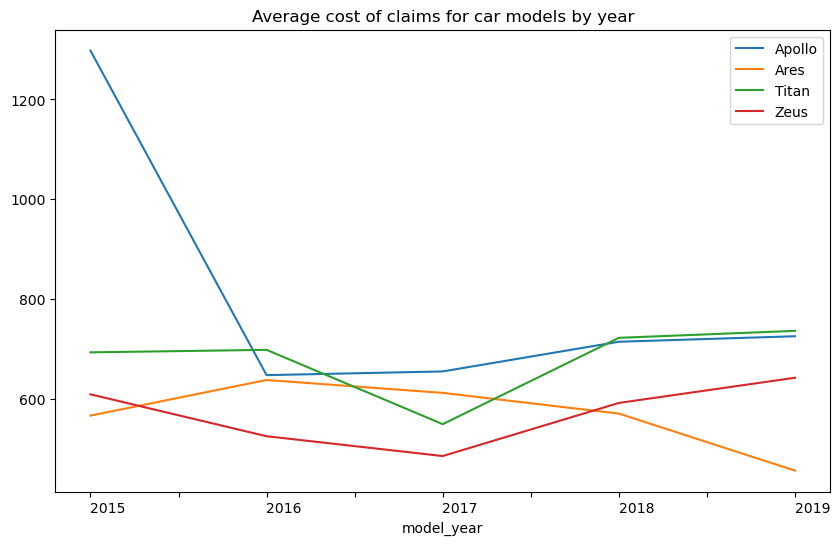

In [82]:
make_year_df.plot(kind = 'line', title = 'Average cost of claims for car models by year', figsize=(10,6));

### d. Date columns

Calculate the **days_to_repair** and **days_to_process_claim** columns and compute the summary statistics.

In [83]:
(castbl
 .eval("days_to_repair = claim_repair_end_date - claim_repair_start_date", inplace = False)         ## How many days to repair the warranty
 .eval("days_to_process_claim = claim_processed_date - claim_submitted_date", inplace = False)      ## Hoe many days to process a claim
 .loc[:, ['days_to_repair', 'days_to_process_claim']]                                               ## Use the SWAT loc method to specify the columns to analyze
 .describe()                                                                                        ## Use the SWAT describe method for summary statistics
)

,days_to_repair,days_to_process_claim
count,153217.000000,153217.000000
mean,3.043527,4.553176
std,0.542297,2.925297
min,0.000000,0.000000
25%,3.000000,2.000000
50%,3.000000,4.000000
75%,3.000000,7.000000
max,10.000000,11.000000


### Let's practice! Section 4

Confirm the variable retailTbl is referencing the **RAND_RETAIL_DEMO** CAS table in the **Casuser** caslib.

In [84]:
retailTbl

CASTable('RAND_RETAIL_DEMO', caslib='casuser')

1. Use the head method to preview 5 rows from the **RAND_RETAIL_DEMO** CAS table.

In [85]:
retailTbl.head()

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket
0,30617291.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,PC games,921.0,18237.0,43740.0,2009.0,21.0,7.0,147171.36,14.65,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,46-55
1,30617291.0,1.0,NaN,0.0,grocery,Oak,FAST,Internet,canned_goods,1060.0,18228.0,40140.0,2009.0,19.0,4.0,66028.12,14.54,Duluth,46.780373,-92.117079,United States,45.2213,-93.6086,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,MN,45.2213,-93.6086,Over 65
2,30617291.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_handbags,921.0,18237.0,43740.0,2009.0,36.0,11.0,1973216.84,25.25,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,56-65
3,30617378.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,batteries,980.0,18215.0,40140.0,2009.0,10.0,3.0,133939.19,6.50,Redmond,47.669414,-122.123875,United States,47.3522,-121.6130,US_WC,47.0,-121.00,US West Coast,47.0,-121.00,WA,47.3522,-121.6130,Over 65
4,30617439.0,1.0,NaN,0.0,women,Oak,FAST,Resale,women_jewelry,863.0,18266.0,4200.0,2010.0,58.0,32.0,1973216.84,25.91,Toledo,41.665682,-83.575337,United States,40.4959,-82.7383,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,OH,40.4959,-82.7383,56-65


2. Find the number of missing values and distinct values in each column of the **RAND_RETAIL_DEMO** CAS table. Do any columns contain missing values?

In [86]:
retailTbl.distinct()

,Column,NDistinct,NMiss,Trunc
0,CustID,699816.0,0.0,0.0
1,bucket,3.0,0.0,0.0
2,age,124.0,673447.0,0.0
3,loyalty_card,2.0,0.0,0.0
4,Department,6.0,0.0,0.0
5,brand_name,3.0,0.0,0.0
6,Storechain,3.0,0.0,0.0
7,ChannelType,3.0,0.0,0.0
8,Class,143.0,0.0,0.0
9,StoreNum,1076.0,0.0,0.0


3. How many purchases were done using a store **loyalty_card**? Plot the results.

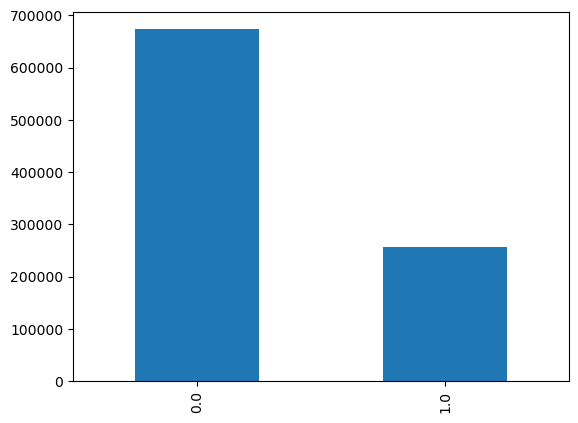

In [87]:
(retailTbl               ## CASTable object
 .loyalty_card           ## CAS column
 .value_counts()         ## SWAT value_counts method
 .plot(kind = 'bar')     ## Plots the Series returned to the client from the CAS server using pandas
);

4. Which **age_bucket** had the most purchases? Sort in descending order.

In [88]:
(retailTbl                       ## CAS table
 .age_bucket                     ## CAS column
 .value_counts()                 ## SWAT value_counts method
 .sort_values(ascending=False)   ## Sort the Series in descending order
)

26-35      166627
36-45      165783
46-55      160212
56-65      155792
18-25      155398
Over 65    126234
dtype: int64

5. View the descriptive statistics of the **Sales**, **Cost**, **mkt_bdgt** and **Margin** columns using the describe method.

In [89]:
numericColumns = ['Sales','Cost','mkt_bdgt','Margin']

retailTbl[numericColumns].describe()

,Sales,Cost,mkt_bdgt,Margin
count,930046.000000,930046.000000,9.300460e+05,930046.000000
mean,41.975865,13.647451,6.575598e+05,28.373364
std,31.806102,8.126211,1.158655e+06,27.848320
min,0.000000,0.000000,0.000000e+00,-58.910000
25%,21.000000,8.000000,2.250530e+04,11.390000
50%,35.000000,13.000000,6.602812e+04,22.270000
75%,58.000000,18.000000,8.635441e+05,42.090000
max,12108.000000,150.000000,5.094381e+06,12107.910000


## 5. Execute SQL in CAS
You can also execute SQL in the CAS server. You must first load the fedSQL action set.

In [90]:
conn.loadActionSet('fedSQL')

NOTE: Added action set 'fedSQL'.


[actionset]

 'fedSQL'

+ Elapsed: 0.0133s, user: 0.00917s, sys: 0.0229s, mem: 1.27mb

The fedSQL action set has one action, execDirect. The execDirect action takes your SQL query as a string. Use a two-level naming convention (caslib.tablename) to reference the CAS table.

In [91]:
myQuery = '''
    select loyalty_card, count(*)
        from casuser.rand_retail_demo
        group by loyalty_card;
'''

conn.execDirect(query = myQuery)

,loyalty_card,COUNT
0,0.0,673447
1,1.0,256599


## 6. Prepare final data

**TABLE REQUIREMENTS**

1. Update the values in the following columns:
    - Remove the string cylinder from the **engine_model** column
    - Upcase the **make** column
2. Create the following columns:
    - days_to_repair = Subtract the **claim_repair_end_date** by the **claim_repair_start_date**
    - days_to_process_claim = Subtract the **claim_processed_date** by the **claim_submitted_date**
    - primary_labor_item = Pull the first word from the **primary_labor_description** column
    - car_serviced = If **service_year_date** is missing then we haven't serviced the car (*Not Serviced*), otherwise we have (*Serviced*) 

### a. Using Python

View the parameters of the **CASTable** object. Confirm that the variable is referencing the **WARRANTY_DEMO** CAS table in the **Casuser** caslib.

In [92]:
castbl

CASTable('WARRANTY_DEMO', caslib='casuser')

Preview the **WARRANTY_DEMO** CAS table.

In [93]:
castbl.head()

,warranty_claim_id,make,product_model,model_year,platform,trim_level,engine_model,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date
0,C1_05003603_4V4NC9GH55N376575,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Detroit,Engine,Energy Unit Assembly - Replace,E-009,782.0,1-889,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Iowa,1.0,USA,D329,41.9716,-93.054,2018-03-07,2018-03-10,2018-03-19,2018-03-14,NaT
1,C1_05003002_4V4NC9GHX5N377737,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Charlotte,Engine,Energy Unit Assembly - Replace,E-009,782.0,5-211,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Iowa,1.0,USA,D366,41.9716,-93.054,2018-02-06,2018-02-09,2018-02-15,2018-02-13,NaT
2,C1_07112001_4V4NC9GH15N379103,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Detroit,Engine,Valve: Moisture Ejector - Replace,E-001,782.0,7-155,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Iowa,1.0,USA,D410,41.9716,-93.054,2018-03-09,2018-03-12,2018-03-18,2018-03-16,2017-06-28
3,C1_07009802_4V4NC9GG55N376440,Zeus,Galacto,2018.0,XE,110.0,8 cylinder,Pittsburgh,Engine,Energy Unit Assembly - Replace,E-009,782.0,5-500,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Iowa,1.0,USA,D390,41.9716,-93.054,2017-12-21,2017-12-24,2018-01-06,2017-12-28,NaT
4,C1_07527501_4V4NC9TJ05N374628,Zeus,Galacto,2018.0,XE,110.0,4 cylinder,Charlotte,Engine,Valve: Pressure Relief - Replace,E-007,782.0,1-986,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Indiana,1.0,USA,D978,40.1683,-86.271,2018-02-05,2018-02-08,2018-02-17,2018-02-12,2017-06-29


#### Update columns in place
Use the [table.update](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-update.htm) CAS action to update rows in a CAS table. The update action takes a list of dictionaries. Each dictionary specifies the column to update.

In [94]:
update_engine_model = {'var':'engine_model', 'value':'scan(engine_model,1)'}

update_make = {'var':'make', 'value':'upcase(make)'}

castbl.update(set = [update_engine_model, 
                     update_make])

[rowsUpdated]

 153217

[tableName]

 'WARRANTY_DEMO'

+ Elapsed: 0.157s, user: 0.752s, sys: 0.654s, mem: 171mb

Preview the updated **make** and **engine_model** columns.

In [95]:
castbl.head()

,warranty_claim_id,make,product_model,model_year,platform,trim_level,engine_model,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date
0,C1_05003603_4V4NC9GH55N376575,ZEUS,Galacto,2018.0,XE,110.0,8,Detroit,Engine,Energy Unit Assembly - Replace,E-009,782.0,1-889,258.400115,39.647471,218.752644,0.000000,4V4NC9GH55N376575,Iowa,1.0,USA,D329,41.9716,-93.054,2018-03-07,2018-03-10,2018-03-19,2018-03-14,NaT
1,C1_05003002_4V4NC9GHX5N377737,ZEUS,Galacto,2018.0,XE,110.0,8,Charlotte,Engine,Energy Unit Assembly - Replace,E-009,782.0,5-211,260.333618,43.423284,216.910334,0.000000,4V4NC9GHX5N377737,Iowa,1.0,USA,D366,41.9716,-93.054,2018-02-06,2018-02-09,2018-02-15,2018-02-13,NaT
2,C1_07112001_4V4NC9GH15N379103,ZEUS,Galacto,2018.0,XE,110.0,8,Detroit,Engine,Valve: Moisture Ejector - Replace,E-001,782.0,7-155,122.133963,111.529820,10.604142,0.000000,4V4NC9GH15N379103,Iowa,1.0,USA,D410,41.9716,-93.054,2018-03-09,2018-03-12,2018-03-18,2018-03-16,2017-06-28
3,C1_07009802_4V4NC9GG55N376440,ZEUS,Galacto,2018.0,XE,110.0,8,Pittsburgh,Engine,Energy Unit Assembly - Replace,E-009,782.0,5-500,103.596372,92.635132,10.961240,0.000000,4V4NC9GG55N376440,Iowa,1.0,USA,D390,41.9716,-93.054,2017-12-21,2017-12-24,2018-01-06,2017-12-28,NaT
4,C1_07527501_4V4NC9TJ05N374628,ZEUS,Galacto,2018.0,XE,110.0,4,Charlotte,Engine,Valve: Pressure Relief - Replace,E-007,782.0,1-986,134.305960,105.674134,22.320732,6.311095,4V4NC9TJ05N374628,Indiana,1.0,USA,D978,40.1683,-86.271,2018-02-05,2018-02-08,2018-02-17,2018-02-12,2017-06-29


#### Create the new calculated columns and create the final CAS table

**SAS Viya** (newer versions of SAS Viya)

In [96]:
(castbl
 .eval("days_to_repair = claim_repair_end_date - claim_repair_start_date", inplace = False)
 .eval("days_to_process_claim = claim_processed_date - claim_submitted_date", inplace = False)
 .eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False)
 .eval("car_serviced = ifc(service_year_date = ., 'Not Serviced', 'Serviced')", inplace = False)
 .copyTable(casout = {'name':'warranty_final',                    ## The copyTable action will create a new CAS table. This action was introduced in Viya 2020.1
                      'caslib':'casuser', 
                      'replace':True})          
)

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'WARRANTY_FINAL'

[casTable]

 CASTable('WARRANTY_FINAL', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.142s, user: 0.761s, sys: 0.802s, mem: 787mb

**SAS Viya for Learners 3.5**

NOTE: If you are using SAS Viya for Learners 3.5 you must use the partition action instead of copyTable.

In [ ]:
#################################################################################################
## Use the following code if you are using SAS Viya for Learners (Viya 3.5)                    ##
## In SAS Viya 3.5 you must use the partition action instead of copyTable. Code is similar.    ##
#################################################################################################
# (castbl
#  .eval("days_to_repair = claim_repair_end_date - claim_repair_start_date", inplace = False)
#  .eval("days_to_process_claim = claim_processed_date - claim_submitted_date", inplace = False)
#  .eval("primary_labor_item = scan(primary_labor_description,1,'–:-','r')", inplace = False)
#  .eval("car_serviced = ifc(service_year_date = ., 'Not Serviced', 'Serviced')", inplace = False)
#  .partition(casout = {'name':'warranty_final', 'caslib':'casuser', 'replace':True})          ## In SAS Viya 3.5 you must use the partition action instead of copyTable. Code is similar.
# )

View available CAS tables. Notice that the new table **WARRANTY_FINAL** was created.

In [97]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,29,0,utf-8,2023-05-30T13:15:47+00:00,2023-05-30T13:43:33+00:00,2023-05-30T13:44:02+00:00,UTF8,2.001072e+09,2.001073e+09,2.001073e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,Peter.Styliadis@sas.com,2023-05-30T13:10:29+00:00,2.001071e+09
1,RAND_RETAIL_DEMO,930046,33,0,utf-8,2023-05-30T13:23:36+00:00,2023-05-30T13:25:08+00:00,2023-05-30T13:42:00+00:00,UTF8,2.001072e+09,2.001072e+09,2.001073e+09,0,0,0,0,RAND_RETAILDEMO.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-30T13:10:38+00:00,2.001071e+09
2,WARRANTY_FINAL,153217,33,0,utf-8,2023-05-30T13:44:02+00:00,2023-05-30T13:44:02+00:00,2023-05-30T13:44:02+00:00,UTF8,2.001073e+09,2.001073e+09,2.001073e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,2023-05-28_WORDLELIST,14855,11,0,utf-8,2023-05-28T15:13:44+00:00,2023-05-28T15:13:44+00:00,2023-05-29T11:17:08+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_wordleList.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:28+00:00,2.000906e+09
4,2023-05-28_ALLLETTERS,74275,3,0,utf-8,2023-05-28T15:15:50+00:00,2023-05-28T15:15:50+00:00,2023-05-29T11:17:09+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_allletters.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:34+00:00,2.000906e+09


Make a reference to the new CAS table in the variable **finalTbl**.

In [99]:
finalTbl = conn.CASTable('WARRANTY_FINAL', caslib = 'casuser')
finalTbl.head()

,warranty_claim_id,make,product_model,model_year,platform,trim_level,engine_model,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date,days_to_repair,days_to_process_claim,primary_labor_item,car_serviced
0,C1_16061301_4V4NC9TH54N367847,ZEUS,Galacto,2017.0,XE,110.0,4,Pittsburgh,Chassis,Actuator: Rt Rear Select Ride - Replace,C-007,476.0,5-839,555.225046,222.266930,332.958116,0.000000,4V4NC9TH54N367847,Arkansas,1.0,USA,D589,35.0113,-92.4881,2017-06-03,2017-06-06,2017-06-15,2017-06-10,2016-12-17,3.0,5.0,Actuator,Serviced
1,C1_05132901_4V4NC9TJ65N368154,ZEUS,Galacto,2018.0,XE,110.0,8,Charlotte,Chassis,Actuator: Rt Rear Select Ride - Replace,C-007,476.0,8-647,2104.599624,240.892957,1609.898979,253.807688,4V4NC9GH35N368992,Florida,1.0,USA,D401,27.8002,-81.6528,2018-05-03,2018-05-06,2018-05-18,2018-05-10,2017-10-23,3.0,8.0,Actuator,Serviced
2,C1_05132901_4V4NC9TJ65N368154,ZEUS,Galacto,2018.0,XE,110.0,4,Pittsburgh,Chassis,Actuator: Rt Rear Select Ride - Replace,C-007,476.0,8-647,2104.599624,240.892957,1609.898979,253.807688,4V4NC9TJ65N368154,Florida,1.0,USA,D401,27.8002,-81.6528,2018-05-03,2018-05-06,2018-05-18,2018-05-10,2017-11-13,3.0,8.0,Actuator,Serviced
3,C1_00525101_4V4NC9TH13N336920,ZEUS,Galacto,2016.0,XE,110.0,4,Pittsburgh,Chassis,Dampening Package Right - Install,C-005,476.0,1-697,693.143518,385.495741,307.647777,0.000000,4V4NC9TH13N336920,Georgia,1.0,USA,D454,33.2598,-83.8337,2018-02-06,2018-02-11,2018-02-19,2018-02-14,2015-07-26,5.0,5.0,Dampening Package Right,Serviced
4,C1_00890102_4V4NC9TH83N337384,ZEUS,Galacto,2016.0,XE,110.0,4,Charlotte,Chassis,Damper: Rear Brake Vibration - Repair/Replace,C-000,476.0,9-246,694.608359,399.026301,295.582058,0.000000,4V4NC9TH83N337384,Georgia,1.0,USA,D281,33.2598,-83.8337,2018-02-19,2018-02-22,2018-03-01,2018-02-26,NaT,3.0,3.0,Damper,Not Serviced


### b. Using SQL
You could of also prepared the CAS table using SQL. This will produce an identical table.

To start, I'll create a list of all the columns in the CAS table (minus the **make** and **engine_model** columns I need to update). Doing it this way makes it dynamic and I don't have to manually type each column.

In [100]:
selectedColumns = castbl.columns.to_list()
selectedColumns.remove('make')
selectedColumns.remove('engine_model')
selectedColumns

['warranty_claim_id',
 'product_model',
 'model_year',
 'platform',
 'trim_level',
 'vehicle_assembly_plant',
 'primary_labor_group',
 'primary_labor_description',
 'primary_labor_code',
 'defect_key',
 'primary_replaced__material_id',
 'gross_claim_amount',
 'gross_labor_amount',
 'gross_material_amount',
 'gross_other_amount',
 'product_unit_id',
 'repairing_state_province',
 'repairing_region',
 'repairing_country',
 'repairing_dealer',
 'latitude',
 'longitude',
 'claim_repair_start_date',
 'claim_repair_end_date',
 'claim_processed_date',
 'claim_submitted_date',
 'service_year_date']

Since the execDirect action takes a string. I am going to create a single string with all of the original columns I want. That way I won't have to manually type them.

In [101]:
listToStr = ','.join([str(elem) for elem in selectedColumns])
listToStr

'warranty_claim_id,product_model,model_year,platform,trim_level,vehicle_assembly_plant,primary_labor_group,primary_labor_description,primary_labor_code,defect_key,primary_replaced__material_id,gross_claim_amount,gross_labor_amount,gross_material_amount,gross_other_amount,product_unit_id,repairing_state_province,repairing_region,repairing_country,repairing_dealer,latitude,longitude,claim_repair_start_date,claim_repair_end_date,claim_processed_date,claim_submitted_date,service_year_date'

Lastly I'll prepare the CAS table using SQL. I'll use a Python f string to add my list of columns, then I'll use SQL code to create the new columns, and update the required columns. I'll name the new CAS table **warranty_final_sql**.

In [102]:
createTableQuery = f'''
    create table casuser.warranty_final_sql as
    select {listToStr},
           upcase(make) as make,
           scan(engine_model,1) as engine_model,
           claim_repair_end_date - claim_repair_start_date as days_to_repair, 
           claim_processed_date - claim_submitted_date as days_to_process_claim,
           scan(primary_labor_description,1,'–:-','r') as primary_labor_item,
           case
               when service_year_date = . then 'Not Serviced'
               else 'Serviced'
           end as car_serviced
    from casuser.warranty_demo;
'''

conn.execdirect(query = createTableQuery)

NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created instead. A DATE format will be associated with the column.
NOTE: CASDAL driver. Creation of a DATE column has been requested, but is not supported by the CASDAL driver. A DOUBLE PRECISION column will be created inst

+ Elapsed: 0.248s, user: 2.57s, sys: 1.75s, mem: 775mb

Confirm the new CAS table **WARRANTY_FINAL_SQL** was created.

In [104]:
conn.tableInfo(caslib = 'casuser')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,WARRANTY_DEMO,153217,29,0,utf-8,2023-05-30T13:15:47+00:00,2023-05-30T13:43:33+00:00,2023-05-30T13:48:27+00:00,UTF8,2.001072e+09,2.001073e+09,2.001074e+09,0,0,0,0,warranty_demo.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,Peter.Styliadis@sas.com,2023-05-30T13:10:29+00:00,2.001071e+09
1,RAND_RETAIL_DEMO,930046,33,0,utf-8,2023-05-30T13:23:36+00:00,2023-05-30T13:25:08+00:00,2023-05-30T13:42:00+00:00,UTF8,2.001072e+09,2.001072e+09,2.001073e+09,0,0,0,0,RAND_RETAILDEMO.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-30T13:10:38+00:00,2.001071e+09
2,WARRANTY_FINAL,153217,33,0,utf-8,2023-05-30T13:44:02+00:00,2023-05-30T13:44:02+00:00,2023-05-30T13:47:32+00:00,UTF8,2.001073e+09,2.001073e+09,2.001074e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,WARRANTY_FINAL_SQL,153217,33,0,utf-8,2023-05-30T13:48:27+00:00,2023-05-30T13:48:27+00:00,2023-05-30T13:48:27+00:00,UTF8,2.001074e+09,2.001074e+09,2.001074e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
4,2023-05-28_WORDLELIST,14855,11,0,utf-8,2023-05-28T15:13:44+00:00,2023-05-28T15:13:44+00:00,2023-05-29T11:17:08+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_wordleList.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:28+00:00,2.000906e+09
5,2023-05-28_ALLLETTERS,74275,3,0,utf-8,2023-05-28T15:15:50+00:00,2023-05-28T15:15:50+00:00,2023-05-29T11:17:09+00:00,UTF8,2.000906e+09,2.000906e+09,2.000978e+09,1,0,0,0,2023-05-28_allletters.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-05-28T15:12:34+00:00,2.000906e+09


### c. Add column labels for the dashboard
I'll add SAS labels to each column. This cleans up the column names for our dashboard. We don't have to do this here, we could manually do this in another application. But this code is dynamic and will add column labels directly to the CAS table, avoiding to have to do this manually in another application.

For each column take the current column name and:
- replace the _ with a space
- make everything title case
- replace Id with ID


Start by viewing the current column attributes. Notice that the label column is missing for each column.

In [105]:
finalTbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,warranty_claim_id,,1,varchar,29,29,,0,0
1,make,,2,varchar,6,6,,0,0
2,product_model,,3,varchar,8,8,,0,0
3,model_year,,4,double,8,12,,0,0
4,platform,,5,varchar,2,2,,0,0
5,trim_level,,6,double,8,12,,0,0
6,engine_model,,7,varchar,5,10,,0,0
7,vehicle_assembly_plant,,8,varchar,10,10,,0,0
8,primary_labor_group,,9,varchar,19,19,,0,0
9,primary_labor_description,,10,varchar,50,50,,0,0


Use a Python list comprehension to create a list of dictionaries. Each dictionary specifies the column to add a label to. The label is created following our requirements.

In [106]:
addLabelsToColumns = [{'name':colname, 'label':colname.replace('_',' ').title().replace('Id','ID')} for colname in finalTbl.columns.to_list()]
addLabelsToColumns

[{'name': 'warranty_claim_id', 'label': 'Warranty Claim ID'},
 {'name': 'make', 'label': 'Make'},
 {'name': 'product_model', 'label': 'Product Model'},
 {'name': 'model_year', 'label': 'Model Year'},
 {'name': 'platform', 'label': 'Platform'},
 {'name': 'trim_level', 'label': 'Trim Level'},
 {'name': 'engine_model', 'label': 'Engine Model'},
 {'name': 'vehicle_assembly_plant', 'label': 'Vehicle Assembly Plant'},
 {'name': 'primary_labor_group', 'label': 'Primary Labor Group'},
 {'name': 'primary_labor_description', 'label': 'Primary Labor Description'},
 {'name': 'primary_labor_code', 'label': 'Primary Labor Code'},
 {'name': 'defect_key', 'label': 'Defect Key'},
 {'name': 'primary_replaced__material_id',
  'label': 'Primary Replaced  Material ID'},
 {'name': 'gross_claim_amount', 'label': 'Gross Claim Amount'},
 {'name': 'gross_labor_amount', 'label': 'Gross Labor Amount'},
 {'name': 'gross_material_amount', 'label': 'Gross Material Amount'},
 {'name': 'gross_other_amount', 'label': '

Add labels to the columns.

In [107]:
## Add the labels
finalTbl.alterTable(columns = addLabelsToColumns)

## View the new column attributes
finalTbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,warranty_claim_id,Warranty Claim ID,1,varchar,29,29,,0,0
1,make,Make,2,varchar,6,6,,0,0
2,product_model,Product Model,3,varchar,8,8,,0,0
3,model_year,Model Year,4,double,8,12,,0,0
4,platform,Platform,5,varchar,2,2,,0,0
5,trim_level,Trim Level,6,double,8,12,,0,0
6,engine_model,Engine Model,7,varchar,5,10,,0,0
7,vehicle_assembly_plant,Vehicle Assembly Plant,8,varchar,10,10,,0,0
8,primary_labor_group,Primary Labor Group,9,varchar,19,19,,0,0
9,primary_labor_description,Primary Labor Description,10,varchar,50,50,,0,0


### Let's practice! Section 6

1. Preview the **RAND_RETAIL_DEMO** CAS table (use the **retailTbl** variable).


In [108]:
retailTbl.head()

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket
0,30617291.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,PC games,921.0,18237.0,43740.0,2009.0,21.0,7.0,147171.36,14.65,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,46-55
1,30617291.0,1.0,NaN,0.0,grocery,Oak,FAST,Internet,canned_goods,1060.0,18228.0,40140.0,2009.0,19.0,4.0,66028.12,14.54,Duluth,46.780373,-92.117079,United States,45.2213,-93.6086,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,MN,45.2213,-93.6086,Over 65
2,30617291.0,1.0,NaN,0.0,women,Oak,FAST,Internet,women_handbags,921.0,18237.0,43740.0,2009.0,36.0,11.0,1973216.84,25.25,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,56-65
3,30617378.0,1.0,NaN,0.0,electronics,Oak,FAST,Internet,batteries,980.0,18215.0,40140.0,2009.0,10.0,3.0,133939.19,6.50,Redmond,47.669414,-122.123875,United States,47.3522,-121.6130,US_WC,47.0,-121.00,US West Coast,47.0,-121.00,WA,47.3522,-121.6130,Over 65
4,30617439.0,1.0,NaN,0.0,women,Oak,FAST,Resale,women_jewelry,863.0,18266.0,4200.0,2010.0,58.0,32.0,1973216.84,25.91,Toledo,41.665682,-83.575337,United States,40.4959,-82.7383,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,OH,40.4959,-82.7383,56-65


2. Propcase the **Department** column and round the **Margin** column to a whole number. Then preview 5 rows of the table.

**HINT: Use the SAS propcase function and round function.**

In [109]:
updateDepartment = {'var':'Department', 'value':'propcase(Department)'}

updateMargin = {'var':'Margin', 'value':'round(Margin)'}

retailTbl.update(set = [updateDepartment, updateMargin])

retailTbl.head()

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket
0,30617291.0,1.0,NaN,0.0,Electronics,Oak,FAST,Internet,PC games,921.0,18237.0,43740.0,2009.0,21.0,7.0,147171.36,15.0,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,46-55
1,30617291.0,1.0,NaN,0.0,Grocery,Oak,FAST,Internet,canned_goods,1060.0,18228.0,40140.0,2009.0,19.0,4.0,66028.12,15.0,Duluth,46.780373,-92.117079,United States,45.2213,-93.6086,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,MN,45.2213,-93.6086,Over 65
2,30617291.0,1.0,NaN,0.0,Women,Oak,FAST,Internet,women_handbags,921.0,18237.0,43740.0,2009.0,36.0,11.0,1973216.84,25.0,Orlando,28.533513,-81.375789,United States,27.8002,-81.6528,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,FL,27.8002,-81.6528,56-65
3,30617378.0,1.0,NaN,0.0,Electronics,Oak,FAST,Internet,batteries,980.0,18215.0,40140.0,2009.0,10.0,3.0,133939.19,7.0,Redmond,47.669414,-122.123875,United States,47.3522,-121.6130,US_WC,47.0,-121.00,US West Coast,47.0,-121.00,WA,47.3522,-121.6130,Over 65
4,30617439.0,1.0,NaN,0.0,Women,Oak,FAST,Resale,women_jewelry,863.0,18266.0,4200.0,2010.0,58.0,32.0,1973216.84,26.0,Toledo,41.665682,-83.575337,United States,40.4959,-82.7383,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,OH,40.4959,-82.7383,56-65


3. Create a new column that calculates the total profit by subtracting **cost** from **sales**. Name the new column **profit**. Then create a new CAS table named **RETAIL_FINAL** in the **Casuser** caslib.

In [110]:
retailTbl.eval('profit = sales - cost')

retailTbl.copyTable(casout = {
        'name':'RETAIL_FINAL',
        'caslib':'casuser'
    })


## Viya for Learners 3.5
# retailTbl.partition(casout = {
#         'name':'RETAIL_FINAL',
#         'caslib':'casuser'
#     })

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'RETAIL_FINAL'

[casTable]

 CASTable('RETAIL_FINAL', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.296s, user: 1.69s, sys: 2.06s, mem: 890mb

4. Reference the new CAS table in the variable finalRetail and preview 5 rows. Confirm the **profit** column was created.

In [111]:
finalRetail = conn.CASTable('RETAIL_FINAL', caslib = 'casuser')

finalRetail.head()

,CustID,bucket,age,loyalty_card,Department,brand_name,Storechain,ChannelType,Class,StoreNum,Date,MDY,Year,Sales,Cost,mkt_bdgt,Margin,City,City_Lat,City_Long,Country,Country_Lat,Country_Long,Region,Region_Lat,Region_Long,Region_2,Region_2_Lat,Region_2_Long,State,State_Lat,State_Long,age_bucket,profit
0,3991843.0,3.0,39.0,1.0,Electronics,Pine,GRAND,Internet,home phones,392.0,18122.0,29340.0,2009.0,52.0,14.0,352518.56,37.0,Chandler,33.297756,-111.863522,United States,33.3523,-111.7709,US_SW,35.0,-106.00,US Southwest,35.0,-106.00,AZ,33.3523,-111.7709,46-55,38.0
1,3991893.0,3.0,22.0,1.0,Health,Pine,GRAND,Internet,bath & body,699.0,18116.0,29340.0,2009.0,15.0,4.0,70379.10,12.0,Duluth,46.780373,-92.117079,United States,45.2213,-93.6086,US_MW,43.3,-84.75,US Midwest,43.3,-84.75,MN,45.2213,-93.6086,46-55,11.0
2,3991903.0,1.0,NaN,0.0,Electronics,Pine,GRAND,Internet,desktop computers,174.0,18271.0,4200.0,2010.0,53.0,15.0,74686.44,37.0,Princeton,40.352206,-74.657071,United States,40.4403,-74.4296,US_AT,40.3,-74.50,US Atlantic Coast,40.3,-74.50,NJ,40.4403,-74.4296,Over 65,38.0
3,3991903.0,1.0,NaN,0.0,Health,Pine,GRAND,Internet,oral care,243.0,18214.0,40140.0,2009.0,30.0,14.0,10620.61,17.0,Birmingham,33.524755,-86.812740,United States,32.9967,-86.7732,US_SE,30.0,-83.00,US Southeast,30.0,-83.00,AL,32.9967,-86.7732,26-35,16.0
4,3991903.0,2.0,NaN,0.0,Grocery,Pine,GRAND,Internet,beverages,174.0,18188.0,36540.0,2009.0,63.0,18.0,13947.96,45.0,Princeton,40.352206,-74.657071,United States,40.4403,-74.4296,US_AT,40.3,-74.50,US Atlantic Coast,40.3,-74.50,NJ,40.4403,-74.4296,56-65,45.0


## 6. Machine learning
You can create a variety of machine learning models using the distributed CAS server.

View the documentation to see all available [CAS Action sets](https://go.documentation.sas.com/doc/en/pgmsascdc/default/allprodsactions/actionSetsByName.htm)

Load the [regression CAS](https://go.documentation.sas.com/doc/en/pgmsascdc/v_039/casactstat/cas-regre) action set.

In [112]:
conn.loadActionSet('regression')
conn.regression?

NOTE: Added action set 'regression'.


Signature:   conn.regression(*args, **kwargs)
Type:        Regression
String form: <swat.cas.actions.Regression object at 0x00000239678BB760>
File:        c:\users\pestyl\anaconda3\lib\site-packages\swat\cas\actions.py
Docstring:  
Regression

Actions
-------
regression.genmod              : Fits generalized linear regression models
regression.genmodscore         : creates a table on the server that contains
                                 results from scoring observations by using a
                                 fitted model
regression.glm                 : Fits linear regression models using the method
                                 of least squares
regression.glmscore            : creates a table on the server that contains
                                 results from scoring observations by using a
                                 fitted model
regression.logistic            : Fits logistic regression models
regression.logisticassociation : computes indices of rank correlatio

Fit a linear regression model using the method of least squares.

In [115]:
cols = ['defect_key', 'trim_level','platform', 'engine_model']

cr_lr = finalTbl.glm(
           target = 'gross_claim_amount',
           inputs = cols,
           selection = {'method':'BACKWARD'}
)

display(cr_lr)

,Class,Levels,Values
0,platform,2.0,GX XE
1,engine_model,4.0,4 6 8 Turbo
,RowId,Description,Value
0,NEFFECTS,Number of Effects,5
1,NPARMS,Number of Parameters,9
,RowId,Description,Value
0,DATA,Data Source,WARRANTY_FINAL
1,RESPONSEVAR,Response Variable,gross_claim_amount
,RowId,Description,Value
0,NREAD,Number of Observations Read,153217.0


In [114]:
cr_lr.keys()

odict_keys(['ClassInfo', 'Dimensions', 'ModelInfo', 'NObs', 'SelectedModel.ANOVA', 'SelectedModel.FitStatistics', 'SelectedModel.ParameterEstimates', 'SelectionInfo', 'Summary.SelectedEffects', 'Summary.SelectionReason', 'Summary.SelectionSummary', 'Summary.StopReason', 'Timing'])

## 7. Save CAS table as a data source file
Just like in Pandas, you might want to save the CAS table (or DataFrame) back to disk. In Pandas you use a to_ method. In CAS use the [table.save](https://go.documentation.sas.com/doc/en/pgmsascdc/v_036/caspg/cas-table-save.htm) CAS action.

Let's confirm the **finalTbl** variable is pointing to the final CAS table.

In [116]:
finalTbl

CASTable('WARRANTY_FINAL', caslib='casuser')

### a. Save as a sashdat file

Save the CAS table as a SASHDAT file. A SASHDAT file is a memory mapped file. It saves a direct copy of the CAS table back to disk. A SASHDAT file will store the SAS formats and labels as well as loaded fast into memory.


In [117]:
finalTbl.save(name='warranty_final.sashdat', 
              caslib = 'casuser', 
              replace = True)

NOTE: Cloud Analytic Services saved the file warranty_final.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'warranty_final.sashdat'

+ Elapsed: 0.32s, user: 0.0469s, sys: 0.278s, mem: 110mb

### b. Save as a csv file

You can also save CAS tables as other file formats likes CSV, parquet, a database table and more.

In [118]:
finalTbl.save(name='warranty_final.csv', 
              caslib = 'casuser', 
              replace = True)

NOTE: Cloud Analytic Services saved the file warranty_final.csv in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'warranty_final.csv'

+ Elapsed: 0.793s, user: 2.37s, sys: 0.191s, mem: 56.5mb

View the new files in the **Casuser** caslib.

In [119]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2023-02-23T14:21:31+00:00,1.992781e+09
1,-rwxr-xr-x,sas,sas,previoussales.sas7bdat,73728,,2023-04-26T20:22:48+00:00,1.998160e+09
2,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
3,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
4,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
5,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-05-30T13:10:29+00:00,2.001071e+09
6,-rwxr-xr-x,sas,sas,warranty_final.sashdat,115538808,NONE,2023-05-30T13:52:52+00:00,2.001074e+09
7,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.csv,240072190,,2023-05-30T13:10:38+00:00,2.001071e+09
9,-rwxr-xr-x,sas,sas,warranty_final.csv,43615117,,2023-05-30T13:52:57+00:00,2.001074e+09


### Let's practice! Section 7

1. Save the **RETAIL_FINAL** CAS table as a SASHDAT file named **finalRetail** the **Casuser** caslib.

In [122]:
finalRetail.save(name = 'finalRetail.sashdat', caslib = 'casuser', replace = True)

NOTE: Cloud Analytic Services saved the file finalRetail.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'finalRetail.sashdat'

+ Elapsed: 0.877s, user: 0.136s, sys: 0.764s, mem: 177mb

2. View all available files in the **Casuser** caslib. Confirm the **finalRetail.sashdat** file was saved.

In [123]:
conn.fileInfo(caslib = 'casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2023-02-23T14:21:31+00:00,1.992781e+09
1,-rwxr-xr-x,sas,sas,previoussales.sas7bdat,73728,,2023-04-26T20:22:48+00:00,1.998160e+09
2,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
3,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
4,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
5,-rwxr-xr-x,sas,sas,warranty_demo.csv,53297896,,2023-05-30T13:10:29+00:00,2.001071e+09
6,-rwxr-xr-x,sas,sas,warranty_final.sashdat,115538808,NONE,2023-05-30T13:52:52+00:00,2.001074e+09
7,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,RAND_RETAILDEMO.csv,240072190,,2023-05-30T13:10:38+00:00,2.001071e+09
9,-rwxr-xr-x,sas,sas,warranty_final.csv,43615117,,2023-05-30T13:52:57+00:00,2.001074e+09


## 8. Terminate the CAS connection
It's best practice to terminate your CAS session when you are done to conserver resources. Your CAS session also has a default timeout value that will disconnect if you odn't.

In [124]:
conn.terminate()

## 9. Open the  **warranty_final.sashdat** in SAS Visual Analytics
1. Log into SAS Viya
2. Select **Show applications** on the top left
3. Select **Explore & Visualize**
4. Select **Start with Data**
5. Then navigate to **Data sources > Casuser** caslib and then right click and load the **warranty_final.sashdat** file into memory

# Additional Resources

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

Additional Resources
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)

# Thank You for Attending!

### Connect with me on LinkedIn!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS